# Introducción al Análisis Exploratorio de Datos con Pandas

Es un enfoque que comprende un conjunto de tareas para analizar conjuntos de datos para poder encontrar sus principales caracteristicas.

Estas tareas en general comprenden todo lo que tenemos que hacer desde que se formula una pregunta interesante, se reunen los datos y se desarrolla el proceso necesario para **poder responder esa pregunta**.

Su Objetivo es:

- Entender los datos.
- Ver caracteristicas de los datos.
- Detectar irregularidades (outliers) de los datos.
- Obtener valores estadisticos de los datos.
- Realizar visualizaciones rapidas que faciliten el proceso de exploracion.

Usualmente el resultado del mismo suele ser un reporte o un notebook, que reune codigo y visualizaciones para llegar a ciertas **conclusiones o insights**.

Es un proceso iterativo, que se retroalimenta.

En general realizaremos el análisis del mismo sobre uno o varios Dataframes.

## Temario

Estos son algunos de los temas que intentaremos revisar a lo largo del analisis propuesto

- Carga de informacion en un DataFrame
- Analizando propiedades especificas del set de datos
- Analizando utilizacion de memoria del dataframe
- Conversion de Datos y mejoras en uso de memoria
- Verificacion de Calidad de Datos
- Manejo de valores nulos
- Manipulando el Data Frame
   - Anatomia de un Data Frame
   - Manejo de Indices
   - Joins
   - Agrupamiento (Group By) para: 
       - Agregacion (agg)
       - Filtrado (filter)
       - Transformacion (transform y apply).


- Manipulando el Data Frame
   - Agrupamiento (Group By) para: 
       - Filtrado (filter)
       - Transformacion (transform y apply).
- Reestructurando Datos
    - Stack / Unstack
    - Pivot Table
- Visualizaciones
    - Examinando la distribucion de una variables
        - Histograma
        - Density Plot
    - Explorando relacion entre variables
        - Overlaid Histogram
        - Scatter Plot
        - Heatmap
    - Comparando Grupos o categorias
        - Bar Plot
        - Grouped Bar Plot
        - Box Plot
    - Recomendaciones generales para visualizacion
- Mas sobre manipulacion de Series y Dataframes
    - rename
    - nlargest, nsmallest
    - Sorting (sort_values)
    - map
    - applymap
    - cumsum
    - cummax
    - pct_change
    - shift
    - diff
    - idxmax
   

In [361]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

## Analisis Exploratorio de Datos: Kickstarter Projects

Para comenzar a trabajar en la distintas operaciones que podemos realizar con un data frame vamos a trabajar con el siguiente set de datos:

[https://www.kaggle.com/kemical/kickstarter-projects/data](https://www.kaggle.com/kemical/kickstarter-projects/data)

Este set de datos posee informacion de unos 300000 proyectos de Kickstarter, la popular plataforma de Crowdsourcing. Nuestro objetivo será realizar un análisis exploratorio sobre esa información, para intentar obtener algunos insights de de la misma.

En particular el dataset tiene dos archivos, uno con informacion parcial recopilada anteriormente y uno con informacion hasta inicios del 2018 (con el que estaremos trabajando).

**Nota:** para aquellos que quieran realizar analisis de los datos anteriores tener en cuenta que el formato de encoding se encuentra en 'Western(windows 1252)' por lo que al realizar la carga con read_csv hay que indicar el encoding como ```encoding='cp1252'```

### Carga de Informacion en un Dataframe

Pandas soporta distintas fuentes de informacion en distintos formatos (desde archivos de csv, excel, hasta fuentes remotas como urls o bases de datos, etc.). En este caso vamos a cargar la informacion desde un CSV que hemos descargado previamente de kaggle. Esto lo podemos hacer con pandas con ```read_csv```. 

Inicialmente podremos ver parte del data frame para tener idea de la estructura del mismo.

In [362]:
# %timeit sirve para evaluar el tiempo de ejecucion
projects_2017 = pd.read_csv('../data/kickstarter-projects/ks-projects-201801.csv')
projects_2017.head()
#projects_2017

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,"1,000.00",2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,"1,533.95"
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,"30,000.00",2017-09-02 04:43:57,"2,421.00",failed,15,US,100.00,"2,421.00","30,000.00"
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,"45,000.00",2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,"45,000.00"
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,"5,000.00",2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,"5,000.00"
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,"19,500.00",2015-07-04 08:35:03,"1,283.00",canceled,14,US,"1,283.00","1,283.00","19,500.00"


In [363]:
# nos da las dimensiones del data frame (rows x columns)
print(projects_2017.shape)

(378661, 15)


In [364]:
# en caso de ser una serie devuelve el numero de rows
# en caso de ser un dataframe devuelve el numero de rows x el numero de columns 
projects_2017.size

5679915

In [365]:
# podemos contar la cantidad de elementos elementos no nulos en el data frame
projects_2017.count()

ID                  378661
name                378657
category            378661
main_category       378661
currency            378661
deadline            378661
goal                378661
launched            378661
pledged             378661
state               378661
backers             378661
country             378661
usd pledged         374864
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64

In [366]:
type(projects_2017["usd pledged"].count())

numpy.int64

### Analizando propiedades especificas del set de datos

Para poder comenzar a orientar nuestro analisis podemos por ejemplo querer comenzar a analizar algunas variables que nos interesan para aplicar en nuestros analisis.
Podemos por ejemplo comenzar las **categorias disponibles principales**

In [367]:
main_categories = projects_2017['main_category']

In [368]:
type(main_categories)

pandas.core.series.Series

In [369]:
# de esta forma obtenemos la cantidad de valores que hay para cada una de las main_categories 
# contando los proyectos por categoria principal
main_categories.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

Tambien podemos interesarnos en ver los posibles valores que podemos tener de **estados de un proyectos**

In [370]:
states = projects_2017['state']
states.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

En ambos casos, podemos considerar a las variables como categoricas que podremos usar para nuestro analisis, las cuales podremos utilizar para agrupar o dividir informacion, o filtrar informacion a considerar en el mismo.


por otro lado podemos analizar la columna **launched** para entender su uso en el data set.

In [371]:
projects_2017['launched'].head()

0    2015-08-11 12:12:28
1    2017-09-02 04:43:57
2    2013-01-12 00:20:50
3    2012-03-17 03:24:11
4    2015-07-04 08:35:03
Name: launched, dtype: object

In [372]:
# generamos nuevas columnas seteando el tipo datetime
projects_2017['launched_datetime'] = pd.to_datetime(projects_2017['launched'])
# generamos una nueva columna obteniendo el año, esto los usuaremos en visualizacion.
projects_2017['year'] = projects_2017['launched_datetime'].dt.year


In [373]:
projects_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 17 columns):
ID                   378661 non-null int64
name                 378657 non-null object
category             378661 non-null object
main_category        378661 non-null object
currency             378661 non-null object
deadline             378661 non-null object
goal                 378661 non-null float64
launched             378661 non-null object
pledged              378661 non-null float64
state                378661 non-null object
backers              378661 non-null int64
country              378661 non-null object
usd pledged          374864 non-null float64
usd_pledged_real     378661 non-null float64
usd_goal_real        378661 non-null float64
launched_datetime    378661 non-null datetime64[ns]
year                 378661 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(8)
memory usage: 49.1+ MB


In [374]:
projects_2017['year'].value_counts()

2015    77300
2014    67745
2016    57184
2017    52200
2013    44851
2012    41165
2011    26237
2010    10519
2009     1329
2018      124
1970        7
Name: year, dtype: int64

La cual podemos ver que nos indica la fecha de lanzamiento del proyecto y que podremos utilizar para desarrollar analisis de series de tiempo.

Haciendo un analisis de algunas de las otras variables podemos tambien llegar a la conclusion de lo que representan las siguientes variables:

- **Goal**: Objetivo a obtener de recaudacion para un proyecto
- **Pledged**: Cantidad recaudada para un proyecto
- **Backers**: Cantidad de personas que invirtieron en el proyecto.

### Analizando utilizacion de memoria del dataframe

Es posible realizar un analisis de utilizacion de memoria del data frame para poder realizar mejoras en el uso de recursos.

In [375]:
# si especificamente queremos saber los datatypes que estamos utilizando.
# y por ejemplo decidir setear algunos especificamente en carga
projects_2017.dtypes

ID                            int64
name                         object
category                     object
main_category                object
currency                     object
deadline                     object
goal                        float64
launched                     object
pledged                     float64
state                        object
backers                       int64
country                      object
usd pledged                 float64
usd_pledged_real            float64
usd_goal_real               float64
launched_datetime    datetime64[ns]
year                          int64
dtype: object

In [376]:
# veamos la informacion general del dataframe con info()
# nos brinda informacion de la cantidad de rows, si tiene campos nulos y el tipo
projects_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 17 columns):
ID                   378661 non-null int64
name                 378657 non-null object
category             378661 non-null object
main_category        378661 non-null object
currency             378661 non-null object
deadline             378661 non-null object
goal                 378661 non-null float64
launched             378661 non-null object
pledged              378661 non-null float64
state                378661 non-null object
backers              378661 non-null int64
country              378661 non-null object
usd pledged          374864 non-null float64
usd_pledged_real     378661 non-null float64
usd_goal_real        378661 non-null float64
launched_datetime    378661 non-null datetime64[ns]
year                 378661 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(8)
memory usage: 49.1+ MB


In [377]:
# indica el uso en bytes de cada columna en bytes
# la opcion deep no permite analizar en profundidad el uso que se esta haciendo de memoria a nivel sistema
#projects_2017.memory_usage(deep=False)
(projects_2017.memory_usage() / (1024 * 1024)).sum()

49.112342834472656

Al contar con informacion sobre las columnas del dataframe o analizandolas podemos hacer mejoras en el uso de los tipos del dataframe de tal forma de optimizar el uso de memoria. Los dtypes usados por pandas son esencialmente los dtypes de NumPy.

### Conversion de Datos y mejoras en uso de memoria

In [378]:
# por ejemplo podriamos castear especificamente una serie a un tipo categorico y verificar su dtype
# esto reduce mucho la utilizacion de memoria.
#main_categories
main_categories.astype('category').dtypes

CategoricalDtype(categories=['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion',
                  'Film & Video', 'Food', 'Games', 'Journalism', 'Music',
                  'Photography', 'Publishing', 'Technology', 'Theater'],
                 ordered=False)

In [379]:
# lo realiza sobre una columna del dataframe especifico
# considerar que devuelve una copia, ver el parametro 'copy'
#projects_2017.astype({'main_category':'category'}).dtypes
projects_2017.astype({'main_category':'category'}).memory_usage()

Index                    128
ID                   3029288
name                 3029288
category             3029288
main_category         379421
currency             3029288
deadline             3029288
goal                 3029288
launched             3029288
pledged              3029288
state                3029288
backers              3029288
country              3029288
usd pledged          3029288
usd_pledged_real     3029288
usd_goal_real        3029288
launched_datetime    3029288
year                 3029288
dtype: int64

In [380]:
# otra forma de realizarlo es indicar en lectura de la fuente de datos los tipos
projects = pd.read_csv('../data/kickstarter-projects/ks-projects-201801.csv', \
                            dtype={'main_category':'category','category':'category',\
                                   'country':'category'})

In [381]:
projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null category
main_category       378661 non-null category
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null category
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: category(3), float64(5), int64(2), object(5)
memory usage: 36.1+ MB


In [382]:
projects.memory_usage()

Index                   128
ID                  3029288
name                3029288
category             763714
main_category        379421
currency            3029288
deadline            3029288
goal                3029288
launched            3029288
pledged             3029288
state               3029288
backers             3029288
country              379485
usd pledged         3029288
usd_pledged_real    3029288
usd_goal_real       3029288
dtype: int64

In [383]:
# devuelve solo las columnas de tipo numerico
projects.select_dtypes('number')

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,"1,000.00",0.00,0,0.00,0.00,"1,533.95"
1,1000003930,"30,000.00","2,421.00",15,100.00,"2,421.00","30,000.00"
2,1000004038,"45,000.00",220.00,3,220.00,220.00,"45,000.00"
3,1000007540,"5,000.00",1.00,1,1.00,1.00,"5,000.00"
4,1000011046,"19,500.00","1,283.00",14,"1,283.00","1,283.00","19,500.00"
...,...,...,...,...,...,...,...
378656,999976400,"50,000.00",25.00,1,25.00,25.00,"50,000.00"
378657,999977640,"1,500.00",155.00,5,155.00,155.00,"1,500.00"
378658,999986353,"15,000.00",20.00,1,20.00,20.00,"15,000.00"
378659,999987933,"15,000.00",200.00,6,200.00,200.00,"15,000.00"


In [384]:
# devuelve solo las columnas de tipo categorico que inicializamos en el dataframe
projects.select_dtypes('category')

,category,main_category,country
0,Poetry,Publishing,GB
1,Narrative Film,Film & Video,US
2,Narrative Film,Film & Video,US
3,Music,Music,US
4,Film & Video,Film & Video,US
...,...,...,...
378656,Documentary,Film & Video,US
378657,Narrative Film,Film & Video,US
378658,Narrative Film,Film & Video,US
378659,Technology,Technology,US


In [385]:
main_categories.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [386]:
# conversion de pd.Series a python list
counts = main_categories.value_counts().tolist()
print(counts)
print(type(counts))

[63585, 51918, 39874, 35231, 32569, 30070, 28153, 24602, 22816, 10913, 10819, 10779, 8809, 4755, 3768]
<class 'list'>


In [387]:
main_categories.value_counts().index

Index(['Film & Video', 'Music', 'Publishing', 'Games', 'Technology', 'Design',
       'Art', 'Food', 'Fashion', 'Theater', 'Comics', 'Photography', 'Crafts',
       'Journalism', 'Dance'],
      dtype='object')

In [388]:
# conversion de pd.Series a pd.DataFrame
main_categories.to_frame()

,main_category
0,Publishing
1,Film & Video
2,Film & Video
3,Music
4,Film & Video
...,...
378656,Film & Video
378657,Film & Video
378658,Film & Video
378659,Technology


### Verificacion de Calidad de Datos

Algunas verificaciones que son utiles para ver la consistencia de los datos, en particular si vienen de una fuente de ese tipo.

Podemos verificar las dimensiones del data frame (via ```.shape```), si existen valores nulos (via ```.insnull```) en el mismo y metricas generales de las columnas o features del data frame que podemos analizar via ```.describe```

In [389]:
# por ejemplo de la siguiente forma podemos ver los nulos si existen
projects_2017.isnull().any()

ID                   False
name                  True
category             False
main_category        False
currency             False
deadline             False
goal                 False
launched             False
pledged              False
state                False
backers              False
country              False
usd pledged           True
usd_pledged_real     False
usd_goal_real        False
launched_datetime    False
year                 False
dtype: bool

In [390]:
projects_2017.isnull().sum()

ID                      0
name                    4
category                0
main_category           0
currency                0
deadline                0
goal                    0
launched                0
pledged                 0
state                   0
backers                 0
country                 0
usd pledged          3797
usd_pledged_real        0
usd_goal_real           0
launched_datetime       0
year                    0
dtype: int64

La informacion que podemos considerar en relacion a los nulos nos permite guiarnos sobre la calidad del set de datos que tenemos y casos en los que podemos ver por ejemplo que datos utilizar o no sobre nuestros analisis o si eventualmente tenemos que realizar algun otro tipo de informacion

In [391]:
# metricas generales de las columnas o features numericos del data frame que podemos analizar via .describe
projects_2017.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,year
count,"378,661.00","378,661.00","378,661.00","378,661.00","374,864.00","378,661.00","378,661.00","378,661.00"
mean,"1,074,731,191.99","49,080.79","9,682.98",105.62,"7,036.73","9,058.92","45,454.40","2,014.25"
std,"619,086,204.32","1,183,391.26","95,636.01",907.19,"78,639.75","90,973.34","1,152,950.06",1.93
min,"5,971.00",0.01,0.00,0.00,0.00,0.00,0.01,"1,970.00"
25%,"538,263,516.00","2,000.00",30.00,2.00,16.98,31.00,"2,000.00","2,013.00"
50%,"1,075,275,634.00","5,200.00",620.00,12.00,394.72,624.33,"5,500.00","2,014.00"
75%,"1,610,148,624.00","16,000.00","4,076.00",56.00,"3,034.09","4,050.00","15,500.00","2,016.00"
max,"2,147,476,221.00","100,000,000.00","20,338,986.27","219,382.00","20,338,986.27","20,338,986.27","166,361,390.71","2,018.00"


Para nuestros analisis y considerando los valores de media y desviacion podemos ver que hay una gran dispersion tanto en las columnas de goal, pledged y backers. Esto puede darnos algunos problemas para intentar visualizar esas variables.

In [392]:
# para visualizar toda la informacion
projects_2017.describe(include='all')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_datetime,year
count,"378,661.00",378657,378661,378661,378661,378661,"378,661.00",378661,"378,661.00",378661,"378,661.00",378661,"374,864.00","378,661.00","378,661.00",378661,"378,661.00"
unique,nan,375764,159,15,14,3164,nan,378089,nan,6,nan,23,nan,nan,nan,378089,nan
top,nan,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,nan,1970-01-01 01:00:00,nan,failed,nan,US,nan,nan,nan,1970-01-01 01:00:00,nan
freq,nan,41,22314,63585,295365,705,nan,7,nan,197719,nan,292627,nan,nan,nan,7,nan
first,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,1970-01-01 01:00:00,nan
last,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,2018-01-02 15:02:31,nan
mean,"1,074,731,191.99",NaN,NaN,NaN,NaN,NaN,"49,080.79",NaN,"9,682.98",NaN,105.62,NaN,"7,036.73","9,058.92","45,454.40",NaN,"2,014.25"
std,"619,086,204.32",NaN,NaN,NaN,NaN,NaN,"1,183,391.26",NaN,"95,636.01",NaN,907.19,NaN,"78,639.75","90,973.34","1,152,950.06",NaN,1.93
min,"5,971.00",NaN,NaN,NaN,NaN,NaN,0.01,NaN,0.00,NaN,0.00,NaN,0.00,0.00,0.01,NaN,"1,970.00"
25%,"538,263,516.00",NaN,NaN,NaN,NaN,NaN,"2,000.00",NaN,30.00,NaN,2.00,NaN,16.98,31.00,"2,000.00",NaN,"2,013.00"


In [393]:
#projects_2017['country'].value_counts()
projects_2017 = projects_2017[projects_2017['country'] == 'US']

In [394]:
projects_2017['currency'].value_counts()

USD    292627
Name: currency, dtype: int64

### Manejo de valores nulos

In [395]:
projects_2017.isnull().any()

ID                   False
name                  True
category             False
main_category        False
currency             False
deadline             False
goal                 False
launched             False
pledged              False
state                False
backers              False
country              False
usd pledged          False
usd_pledged_real     False
usd_goal_real        False
launched_datetime    False
year                 False
dtype: bool

In [396]:
# podemos eliminar aquellos proyectos que tienen informacion de nula en su nombre
# tener en cuenta que es necesario hacer un inplace=True para que modifique el dataframe original
projects_2017.dropna(subset=['name']).isnull().any()

ID                   False
name                 False
category             False
main_category        False
currency             False
deadline             False
goal                 False
launched             False
pledged              False
state                False
backers              False
country              False
usd pledged          False
usd_pledged_real     False
usd_goal_real        False
launched_datetime    False
year                 False
dtype: bool

In [397]:
# podemos especificamente reemplazar esos valores por un valor especifico
# en este caso indicamos para que columna queremos hacer el reemplazo
# tener en cuenta que se puede realizar tambien inplace en el dataframe
projects_2017.fillna(value={'usd pledged': 0}).isnull().any()

ID                   False
name                  True
category             False
main_category        False
currency             False
deadline             False
goal                 False
launched             False
pledged              False
state                False
backers              False
country              False
usd pledged          False
usd_pledged_real     False
usd_goal_real        False
launched_datetime    False
year                 False
dtype: bool

## Manipulando el Data Frame

En la siguiente seccion, trabajaremos con este data frame para poder incorporar algunos conceptos y herramientas que pueden sernos de utilidad en nuestro analisis exploratorio.

In [398]:
projects_2017 = pd.read_csv('../data/kickstarter-projects/ks-projects-201801.csv')
# generamos nuevas columnas seteando el tipo datetime
projects_2017['launched_datetime'] = pd.to_datetime(projects_2017['launched'])
# generamos una nueva columna obteniendo el año, esto los usuaremos en visualizacion.
projects_2017['year'] = projects_2017['launched_datetime'].dt.year
projects_2017 = projects_2017[projects_2017['country'] == 'US']

### Anatomia de un Data Frame

![title](img/anatomy_df.png)

### Manejo de Indices

- Proveen un label para cada una de las filas en el DataFrame
- Si un indice no se encuentra indicado explicitamente, un RangeIndex es creado por default con label comenzando en 0.

Dado nuestro DataFrame, podemos evaluar el indice actualmente que tiene de la siguiente forma

In [399]:
projects_2017.index

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     11,
            ...
            378648, 378649, 378650, 378653, 378654, 378656, 378657, 378658,
            378659, 378660],
           dtype='int64', length=292627)

In [400]:
type(projects_2017.index) # en este caso a tomado inicialmente el indice del campo ID del csv.

pandas.core.indexes.numeric.Int64Index

In [401]:
projects_2017.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292627 entries, 1 to 378660
Data columns (total 17 columns):
ID                   292627 non-null int64
name                 292624 non-null object
category             292627 non-null object
main_category        292627 non-null object
currency             292627 non-null object
deadline             292627 non-null object
goal                 292627 non-null float64
launched             292627 non-null object
pledged              292627 non-null float64
state                292627 non-null object
backers              292627 non-null int64
country              292627 non-null object
usd pledged          292627 non-null float64
usd_pledged_real     292627 non-null float64
usd_goal_real        292627 non-null float64
launched_datetime    292627 non-null datetime64[ns]
year                 292627 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(8)
memory usage: 40.2+ MB


#### Eliminando el indice

Para poder eliminar un indice especifico que tiene el DataFrame podemos utilizar el metodo ```reset_index```

In [402]:
# en este caso si elimino el indice
projects_2017.reset_index(inplace=True) #notar que si queremos hacerlo sobre el mismo DataFrame tenemos que usar

In [403]:
# obtengo el indice por default de un DataFrame en pandas, RangeIndex
projects_2017.index

RangeIndex(start=0, stop=292627, step=1)

Una caracteristica deseable de un indice es que el mismo nos permita identificar a cada una de las filas y en ese sentido el RangeIndex por default no es muy util. Hace sentido utilizar un campo que pueda identificar cada fila, por ejemplo ```ID``` o ```name```.

In [404]:
projects_2017

,index,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_datetime,year
0,1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,"30,000.00",2017-09-02 04:43:57,"2,421.00",failed,15,US,100.00,"2,421.00","30,000.00",2017-09-02 04:43:57,2017
1,2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,"45,000.00",2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,"45,000.00",2013-01-12 00:20:50,2013
2,3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,"5,000.00",2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,"5,000.00",2012-03-17 03:24:11,2012
3,4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,"19,500.00",2015-07-04 08:35:03,"1,283.00",canceled,14,US,"1,283.00","1,283.00","19,500.00",2015-07-04 08:35:03,2015
4,5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,"50,000.00",2016-02-26 13:38:27,"52,375.00",successful,224,US,"52,375.00","52,375.00","50,000.00",2016-02-26 13:38:27,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292622,378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,"50,000.00",2014-09-17 02:35:30,25.00,canceled,1,US,25.00,25.00,"50,000.00",2014-09-17 02:35:30,2014
292623,378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,"1,500.00",2011-06-22 03:35:14,155.00,failed,5,US,155.00,155.00,"1,500.00",2011-06-22 03:35:14,2011
292624,378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,"15,000.00",2010-07-01 19:40:30,20.00,failed,1,US,20.00,20.00,"15,000.00",2010-07-01 19:40:30,2010
292625,378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,"15,000.00",2016-01-13 18:13:53,200.00,failed,6,US,200.00,200.00,"15,000.00",2016-01-13 18:13:53,2016


#### Creando un Indice

Lo realizamos mediante el metodo ```set_index```.

Tambien se puede hacer esto en lectura del archivo via ```read_csv``` indicando el indice con el parametro ```index_col```.

In [405]:
projects_2017.set_index('ID', inplace=True) 
# tambien se puede indicar al cargar el data frame usando el parametro index_col
# si no se quiere que se elimine la columna ID, usar parametro drop=False

In [406]:
# volvemos al indice que obtuvimos en carga
projects_2017.index

Int64Index([1000003930, 1000004038, 1000007540, 1000011046, 1000014025,
            1000023410, 1000030581, 1000034518,  100004195,  100005484,
            ...
             999955533,  999963618,   99996661,  999972264,  999975836,
             999976400,  999977640,  999986353,  999987933,  999988282],
           dtype='int64', name='ID', length=292627)

In [407]:
projects_2017

,index,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_datetime,year
ID,,,,,,,,,,,,,,,,,
1000003930,1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,"30,000.00",2017-09-02 04:43:57,"2,421.00",failed,15,US,100.00,"2,421.00","30,000.00",2017-09-02 04:43:57,2017
1000004038,2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,"45,000.00",2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,"45,000.00",2013-01-12 00:20:50,2013
1000007540,3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,"5,000.00",2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,"5,000.00",2012-03-17 03:24:11,2012
1000011046,4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,"19,500.00",2015-07-04 08:35:03,"1,283.00",canceled,14,US,"1,283.00","1,283.00","19,500.00",2015-07-04 08:35:03,2015
1000014025,5,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,"50,000.00",2016-02-26 13:38:27,"52,375.00",successful,224,US,"52,375.00","52,375.00","50,000.00",2016-02-26 13:38:27,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,"50,000.00",2014-09-17 02:35:30,25.00,canceled,1,US,25.00,25.00,"50,000.00",2014-09-17 02:35:30,2014
999977640,378657,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,"1,500.00",2011-06-22 03:35:14,155.00,failed,5,US,155.00,155.00,"1,500.00",2011-06-22 03:35:14,2011
999986353,378658,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,"15,000.00",2010-07-01 19:40:30,20.00,failed,1,US,20.00,20.00,"15,000.00",2010-07-01 19:40:30,2010


Por default tanto set_index como read_csv realizan un drop de la columa utilizada como indice del Data Frame. Con set_index es posible mantener la columa en el DataFrame usando el parametro ```drop``` en ```False```

## Join

Ver otro notebook de referencia para desarrollar el ejemplo.

## Agrupamiento (Group By) para agregacion, filtrado y transformacion

Al referirnos usualmente a ```groupby```, usualmente hacemos referencia al proceso conocido como split-apply-combine que considera:

- Split: Separar los datos en grupos basados en algun tipo de criterio.
- Apply: Aplicar una funcion a cada uno de los grupos de forma independiente.
- Combine: Combinar los resultados en una estructura de datos resultante.


El uso mas comun de groupby is para realizar una agregacion (la cual toma varios valores y los convierte en un unico valor)

In [408]:
projects_2017.groupby(['main_category','state'])

In [409]:
# agrupando usando multiples columnas
grouped = projects_2017.groupby(['main_category','state'])\
    .agg({'backers':['mean','sum'],'pledged':'mean', 'goal':'mean'}) 

In [410]:
type(grouped)

pandas.core.frame.DataFrame

In [411]:
grouped.index

MultiIndex([(         'Art',   'canceled'),
            (         'Art',     'failed'),
            (         'Art',       'live'),
            (         'Art', 'successful'),
            (         'Art',  'suspended'),
            (      'Comics',   'canceled'),
            (      'Comics',     'failed'),
            (      'Comics',       'live'),
            (      'Comics', 'successful'),
            (      'Comics',  'suspended'),
            (      'Crafts',   'canceled'),
            (      'Crafts',     'failed'),
            (      'Crafts',       'live'),
            (      'Crafts', 'successful'),
            (      'Crafts',  'suspended'),
            (       'Dance',   'canceled'),
            (       'Dance',     'failed'),
            (       'Dance',       'live'),
            (       'Dance', 'successful'),
            (       'Dance',  'suspended'),
            (      'Design',   'canceled'),
            (      'Design',     'failed'),
            (      'Design',    

In [412]:
per_year = projects_2017.groupby('year')\
    .agg({'backers':['mean','sum'],'pledged':['mean','sum'], 'goal': ['mean','sum']})

In [413]:
per_year.index

Int64Index([1970, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype='int64', name='year')

### Agregacion

Siguiendo un poco los casos anteriores podemos indicar el campo y la funcion de agregacion para hacerlo por una unica columna

In [414]:
per_year = projects_2017.groupby('year').agg({'backers':'sum'}) # notar que se obtiene un DataFrame
per_year

,backers
year,
1970,0
2009,43758
2010,406875
2011,1396473
2012,4224656
2013,5705141
2014,5182188
2015,5989765
2016,5388809


Otra variante es indicar la columna en la el metodo agg podemos seleccionarla usando el operador de indexacion

In [415]:
per_year = projects_2017.groupby('year')['backers'].agg('sum') # notar que se obteniene una Serie
per_year

year
1970          0
2009      43758
2010     406875
2011    1396473
2012    4224656
2013    5705141
2014    5182188
2015    5989765
2016    5388809
2017    4751487
2018        704
Name: backers, dtype: int64

In [416]:
# cuidado entre las funciones de sum de pandas y numpy. (manejo de nulos)
per_year = projects_2017.groupby('year')['backers'].agg(np.sum)
per_year

year
1970          0
2009      43758
2010     406875
2011    1396473
2012    4224656
2013    5705141
2014    5182188
2015    5989765
2016    5388809
2017    4751487
2018        704
Name: backers, dtype: int64

In [417]:
per_year = projects_2017.groupby('year')['backers'].sum()
print(per_year)

year
1970          0
2009      43758
2010     406875
2011    1396473
2012    4224656
2013    5705141
2014    5182188
2015    5989765
2016    5388809
2017    4751487
2018        704
Name: backers, dtype: int64


A su vez diferentes funciones pueden aplicarse en la misma operacion y a de distintos tipos a distintas columnas.

In [418]:
grouped = projects_2017.groupby('year')

In [419]:
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [420]:
# con np.sqrt esto va a fallar ya que la funcion no realiza agregacion
# con np.sum va a funcionar bien
#projects_2017.groupby('year').agg(np.sqrt)
projects_2017.groupby('year').agg(np.sum)

,index,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
year,,,,,,,
1970,742657,"35,200.00",0.00,0,0.00,0.00,"35,200.00"
2009,252369024,"9,385,495.26","2,845,501.11",43758,"2,845,501.11","2,845,501.11","9,385,495.26"
2010,1997134638,"138,793,982.64","29,458,272.97",406875,"29,458,272.97","29,458,272.97","138,793,982.64"
2011,4952690423,"326,340,131.81","103,752,593.77",1396473,"103,752,593.77","103,752,593.77","326,340,131.81"
2012,7698258896,"800,195,270.26","314,664,113.74",4224656,"314,664,113.74","314,664,113.74","800,195,270.26"
2013,7340866638,"1,040,509,287.00","429,622,210.70",5705141,"429,622,210.70","429,622,210.70","1,040,509,287.00"
2014,9593003721,"2,423,187,674.00","433,223,285.43",5182188,"433,223,285.43","433,223,285.43","2,423,187,674.00"
2015,10124012976,"4,001,328,129.00","558,394,706.09",5989765,"558,394,706.09","558,394,706.09","4,001,328,129.00"
2016,7222706785,"2,693,072,417.00","503,722,817.56",5388809,"284,182,095.34","503,722,817.56","2,693,072,417.00"


In [421]:
# notar que se indica una funcion built-in y una custom (la de numpy)
per_year = projects_2017.groupby('year').agg({'backers':np.sum,'pledged': ['mean', 'sum']})
per_year

backers              pledged                     
          sum                 mean                  sum
year                                                   
1970        0                 0.00                 0.00
2009    43758             2,141.08         2,845,501.11
2010   406875             2,800.48        29,458,272.97
2011  1396473             3,954.44       103,752,593.77
2012  4224656             7,760.48       314,664,113.74
2013  5705141            11,105.08       429,622,210.70
2014  5182188             8,533.22       433,223,285.43
2015  5989765            10,428.90       558,394,706.09
2016  5388809            13,245.41       503,722,817.56
2017  4751487            13,809.61       454,032,420.13
2018      704               532.44            43,660.00

In [422]:
# tenemos un multi indice de columnas
# tiene en el top level las columnas de agregacion
# tiene en el bottom level el resultado de aplicar las funciones de agregacion
per_year.columns

MultiIndex([('backers',  'sum'),
            ('pledged', 'mean'),
            ('pledged',  'sum')],
           )

In [423]:
per_year.reset_index(inplace=True)

In [424]:
per_year

year  backers              pledged                     
              sum                 mean                  sum
0   1970        0                 0.00                 0.00
1   2009    43758             2,141.08         2,845,501.11
2   2010   406875             2,800.48        29,458,272.97
3   2011  1396473             3,954.44       103,752,593.77
4   2012  4224656             7,760.48       314,664,113.74
5   2013  5705141            11,105.08       429,622,210.70
6   2014  5182188             8,533.22       433,223,285.43
7   2015  5989765            10,428.90       558,394,706.09
8   2016  5388809            13,245.41       503,722,817.56
9   2017  4751487            13,809.61       454,032,420.13
10  2018      704               532.44            43,660.00

In [425]:
per_year.columns = ['year', 'backers_sum', 'pledged_mean', 'pledge_sum']

In [426]:
per_year

,year,backers_sum,pledged_mean,pledge_sum
0,1970,0,0.00,0.00
1,2009,43758,"2,141.08","2,845,501.11"
2,2010,406875,"2,800.48","29,458,272.97"
3,2011,1396473,"3,954.44","103,752,593.77"
4,2012,4224656,"7,760.48","314,664,113.74"
5,2013,5705141,"11,105.08","429,622,210.70"
6,2014,5182188,"8,533.22","433,223,285.43"
7,2015,5989765,"10,428.90","558,394,706.09"
8,2016,5388809,"13,245.41","503,722,817.56"
9,2017,4751487,"13,809.61","454,032,420.13"


In [427]:
# en caso de querer volver a tener el indice por año
per_year.set_index('year', inplace=True)

In [428]:
per_year

,backers_sum,pledged_mean,pledge_sum
year,,,
1970,0,0.00,0.00
2009,43758,"2,141.08","2,845,501.11"
2010,406875,"2,800.48","29,458,272.97"
2011,1396473,"3,954.44","103,752,593.77"
2012,4224656,"7,760.48","314,664,113.74"
2013,5705141,"11,105.08","429,622,210.70"
2014,5182188,"8,533.22","433,223,285.43"
2015,5989765,"10,428.90","558,394,706.09"
2016,5388809,"13,245.41","503,722,817.56"


### Agregacion por multiples columnas

Group by puede recibir un conjunto de columnas, por ejemplo volviendo a nuestro **anterior analisis por categoria y estado del proyecto.**

In [429]:
grouped = projects_2017.groupby(['main_category','state'])

In [430]:
grouped.count().head(5)

index   name  category  currency  deadline   goal  \
main_category state                                                           
Art           canceled     1667   1667      1667      1667      1667   1667   
              failed      10953  10952     10953     10953     10953  10953   
              live          124    124       124       124       124    124   
              successful   9496   9496      9496      9496      9496   9496   
              suspended      71     71        71        71        71     71   

                          launched  pledged  backers  country  usd pledged  \
main_category state                                                          
Art           canceled        1667     1667     1667     1667         1667   
              failed         10953    10953    10953    10953        10953   
              live             124      124      124      124          124   
              successful      9496     9496     9496     9496         9496   
              suspended         71       71       71       71           71   

                          usd_pledged_real  usd_goal_real  launched_datetime  \
main_category state                                                            
Art           canceled                1667           1667               1667   
              failed                 10953          10953              10953   
              live                     124            124                124   
              successful              9496           9496               9496   
              suspended                 71             71                 71   

                           year  
main_category state              
Art           canceled     1667  
              failed      10953  
              live          124  
              successful   9496  
              suspended      71

In [431]:
type(grouped.count().index)

pandas.core.indexes.multi.MultiIndex

Inevitablemente al utilizar group by, vamos a estar creando un **MultiIndex** en las columnas, filas o ambas. Los DataFrames con MultiIndexes son mas dificiles de navegar y ocasionalmente tienen nombres de columnas mas confusos.

In [432]:
by_main_category_state = projects_2017.groupby(['main_category','state'])\
    .agg({'backers':['mean','sum'],'pledged':'mean', 'goal':'mean'}) 

In [433]:
by_main_category_state

backers                      pledged  \
                                         mean     sum                 mean   
main_category state                                                          
Art           canceled                   8.08   13468               520.37   
              failed                     9.12   99860               641.06   
              live                      16.99    2107             1,126.16   
              successful                88.85  843718             6,919.10   
              suspended                 12.21     867               584.49   
...                                       ...     ...                  ...   
Theater       canceled                  13.51    6415             1,407.74   
              failed                    12.25   36434             1,035.45   
              live                      30.76     892             3,793.40   
              successful                75.54  394405             6,422.14   
              suspended                  4.64      51               105.27   

                                         goal  
                                         mean  
main_category state                            
Art           canceled              42,709.40  
              failed                56,330.52  
              live                  21,166.93  
              successful             4,522.81  
              suspended             11,931.52  
...                                       ...  
Theater       canceled             114,751.53  
              failed                54,260.62  
              live                  11,427.59  
              successful             5,562.83  
              suspended             34,531.45  

[75 rows x 4 columns]

Al hacer esto, obtenemos una estructura con dos niveles de indices. Esto dificulta el acceso a los datos.

Es por eso que intentaremos simplificar la estructura, para ello intentemos entender como esta la informacion en cada nivel de la misma

In [434]:
level0 = by_main_category_state.columns.get_level_values(0)

In [435]:
level0

Index(['backers', 'backers', 'pledged', 'goal'], dtype='object')

In [436]:
level1 = by_main_category_state.columns.get_level_values(1)

In [437]:
level1

Index(['mean', 'sum', 'mean', 'mean'], dtype='object')

Podemos ver que tenemos multiples columnas que se llaman mean, cada una correspondiente a backers, pledged y goal respectivamente.

vamos a intentar reducir esta estructura, concatenando ambos niveles en el mismo nombre de columna

In [438]:
by_main_category_state.columns = [level0,level1] #inmortalizar

In [439]:
by_main_category_state.columns = level0 + '_' + level1

In [440]:
by_main_category_state.columns

Index(['backers_mean', 'backers_sum', 'pledged_mean', 'goal_mean'], dtype='object')

In [441]:
by_main_category_state.T.reset_index().T

0                    1  \
main_category state                                                  
index                            backers_mean          backers_sum   
Art           canceled                   8.08            13,468.00   
              failed                     9.12            99,860.00   
              live                      16.99             2,107.00   
              successful                88.85           843,718.00   
...                                       ...                  ...   
Theater       canceled                  13.51             6,415.00   
              failed                    12.25            36,434.00   
              live                      30.76               892.00   
              successful                75.54           394,405.00   
              suspended                  4.64                51.00   

                                            2                    3  
main_category state                                                 
index                            pledged_mean            goal_mean  
Art           canceled                 520.37            42,709.40  
              failed                   641.06            56,330.52  
              live                   1,126.16            21,166.93  
              successful             6,919.10             4,522.81  
...                                       ...                  ...  
Theater       canceled               1,407.74           114,751.53  
              failed                 1,035.45            54,260.62  
              live                   3,793.40            11,427.59  
              successful             6,422.14             5,562.83  
              suspended                105.27            34,531.45  

[76 rows x 4 columns]

Podemos ver que todavia tenemos dos niveles pero esto podemos reducirlo realizando un ```reset_index```

In [442]:
by_main_category_state.reset_index()

,main_category,state,backers_mean,backers_sum,pledged_mean,goal_mean
0,Art,canceled,8.08,13468,520.37,"42,709.40"
1,Art,failed,9.12,99860,641.06,"56,330.52"
2,Art,live,16.99,2107,"1,126.16","21,166.93"
3,Art,successful,88.85,843718,"6,919.10","4,522.81"
4,Art,suspended,12.21,867,584.49,"11,931.52"
...,...,...,...,...,...,...
70,Theater,canceled,13.51,6415,"1,407.74","114,751.53"
71,Theater,failed,12.25,36434,"1,035.45","54,260.62"
72,Theater,live,30.76,892,"3,793.40","11,427.59"
73,Theater,successful,75.54,394405,"6,422.14","5,562.83"


Si queremos realizar el cambio de forma permanente en el DataFrame debemos realizarlo inPlace

In [443]:
by_main_category_state.reset_index(inplace=True)

In [444]:
by_main_category_state

,main_category,state,backers_mean,backers_sum,pledged_mean,goal_mean
0,Art,canceled,8.08,13468,520.37,"42,709.40"
1,Art,failed,9.12,99860,641.06,"56,330.52"
2,Art,live,16.99,2107,"1,126.16","21,166.93"
3,Art,successful,88.85,843718,"6,919.10","4,522.81"
4,Art,suspended,12.21,867,584.49,"11,931.52"
...,...,...,...,...,...,...
70,Theater,canceled,13.51,6415,"1,407.74","114,751.53"
71,Theater,failed,12.25,36434,"1,035.45","54,260.62"
72,Theater,live,30.76,892,"3,793.40","11,427.59"
73,Theater,successful,75.54,394405,"6,422.14","5,562.83"


Por ultimo es importante notar que dependiendo del nivel de agrupamiento podriamos contar con multiples niveles

In [445]:
# por ejemplo agrupando por main_category, category (sub categoria) y state 
projects_2017.groupby(['main_category','category','state']).agg({'backers':['mean','sum'],'pledged':'mean', 'goal':'mean'}) 

backers          \
                                                  mean     sum   
main_category category state                                     
Art           Art      canceled                   7.41    3794   
                       failed                     9.56   30241   
                       live                      10.82     476   
                       successful                89.93  247315   
                       suspended                 18.00     504   
...                                                ...     ...   
Theater       Theater  canceled                  16.75    5124   
                       failed                    13.99   27808   
                       live                      12.00      60   
                       successful                71.60  278601   
                       suspended                  6.14      43   

                                               pledged                 goal  
                                                  mean                 mean  
main_category category state                                                 
Art           Art      canceled                 439.67            42,464.77  
                       failed                   672.17            90,218.96  
                       live                   1,136.84             8,975.45  
                       successful             7,481.84             5,153.35  
                       suspended                416.64            10,302.82  
...                                                ...                  ...  
Theater       Theater  canceled               1,690.81            20,937.56  
                       failed                 1,163.78            27,370.55  
                       live                     874.20             2,740.00  
                       successful             5,778.49             5,074.41  
                       suspended                133.86            51,788.00  

[799 rows x 4 columns]

## Filtrado (Filtering)

In [447]:
projects_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292627 entries, 1000003930 to 999988282
Data columns (total 17 columns):
index                292627 non-null int64
name                 292624 non-null object
category             292627 non-null object
main_category        292627 non-null object
currency             292627 non-null object
deadline             292627 non-null object
goal                 292627 non-null float64
launched             292627 non-null object
pledged              292627 non-null float64
state                292627 non-null object
backers              292627 non-null int64
country              292627 non-null object
usd pledged          292627 non-null float64
usd_pledged_real     292627 non-null float64
usd_goal_real        292627 non-null float64
launched_datetime    292627 non-null datetime64[ns]
year                 292627 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(8)
memory usage: 50.2+ MB


In [449]:
projects_2017.groupby('year')['backers'].agg('mean') # notar que se obteniene una Serie

year
1970                   0.00
2009                  32.93
2010                  38.68
2011                  53.23
2012                 104.19
2013                 147.47
2014                 102.07
2015                 111.87
2016                 141.70
2017                 144.52
2018                   8.59
Name: backers, dtype: float64

In [450]:
per_year = projects_2017.groupby('year')
per_year.ngroups

11

In [452]:
def check_backers_threshold(df, threshold):
    return df['backers'].mean() >= threshold

In [453]:
type(check_backers_threshold)

function

In [458]:
per_year_filtered = per_year.filter(check_backers_threshold, threshold=50)

In [459]:
per_year_filtered.groupby('year')['backers'].agg('mean')

year
2011                  53.23
2012                 104.19
2013                 147.47
2014                 102.07
2015                 111.87
2016                 141.70
2017                 144.52
Name: backers, dtype: float64

In [457]:
per_year_filtered.groupby('year').ngroups

6

## Transform


In [461]:
#calculamos el porcentaje que representa dentro de un año, categoria principal y categoria
percentages = projects_2017.groupby(['year','main_category','category'])['goal','pledged']\
                    .transform((lambda x: (x * 100) / x.sum()))
percentages

,goal,pledged
ID,,
1000003930,0.62,0.16
1000004038,0.04,0.00
1000007540,0.02,0.00
1000011046,0.03,0.03
1000014025,0.20,2.43
...,...,...
999976400,0.03,0.00
999977640,0.00,0.00
999986353,0.28,0.00


In [463]:
projects_2017.shape

(292627, 17)

In [ ]:
percentages.shape

## Apply

In [464]:
from collections import OrderedDict

def perform_stats(df):
    # lo usamos para preservar el orden de insercion
    data = OrderedDict()
    
    data['money_to_reach_goal'] = df['pledged'].sum() - df['goal'].sum()
    data['count'] = len(df)
    data['uno'] = 1

    return pd.Series(data)
    

In [465]:
result = projects_2017.groupby(['main_category','category']).apply(perform_stats)

In [466]:
result

money_to_reach_goal                count  \
main_category category                                                   
Art           Art                 -299,061,260.12             6,498.00   
              Ceramics              -2,317,162.84               247.00   
              Conceptual Art        -8,881,622.66               817.00   
              Digital Art           -7,097,591.87               986.00   
              Illustration          -1,904,916.15             2,212.00   
...                                           ...                  ...   
Theater       Immersive            -45,086,521.73               226.00   
              Musical              -17,245,622.01               639.00   
              Plays                 -9,622,910.34               880.00   
              Spaces               -53,981,963.94               163.00   
              Theater              -55,619,883.17             6,197.00   

                                              uno  
main_category category                             
Art           Art                            1.00  
              Ceramics                       1.00  
              Conceptual Art                 1.00  
              Digital Art                    1.00  
              Illustration                   1.00  
...                                           ...  
Theater       Immersive                      1.00  
              Musical                        1.00  
              Plays                          1.00  
              Spaces                         1.00  
              Theater                        1.00  

[170 rows x 3 columns]

## Reestructurando Datos

Para poder trabajar con nuestro set de datos es importante darle importancia a como se encuentran estructurados/presentados para poder facilitar nuestro analisis. Para ello tres principios basicos son de importancia:

- Cada variable conforma una columna
- Cada observacion representa una fila
- Cada tipo de conjunto/unidad de observaciones conforma una tabla

Para facilitar esto estaremos usando algunas funciones como:

- stack
- unstack
- pivot_table

Una buena fuente para profundizar es el siguiente articulo: https://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/

### Stack y Unstack

Esta funcion fue nombrada por una analogia con una coleccion de libros que es reorganizada estando lado a lado en posicion horizontal (las columnas de un data frame) a estar apilados verticalmente uno encima del otro (en el indice del DataFrame).

Asumamos que tenemos un DataFrame con MultiIndices on las filas y columnas. Realizar un Stacking de un DataFrame significa mover el indice por columna mas interno del DataFrame para que se convierta en el indice por fila mas interno del DataFrame resultante (algo asi como rotar y pivotear).

La operacion inversa se llama unstacking. Esto significa mover el indice por fila mas interno del DataFrame para que se convierta en el indice por columna mas interno del DataFrame resultante.

En la siguiente representacion grafica se puede entender mas claramente:

![title](img/stack-unstack1.png)

Podemos entonces trabajar con los siguientes ejemplos

In [467]:
projects_by_main_category = projects_2017.groupby('main_category')\
    .agg({'backers':['mean','sum'],'pledged':'mean',\
          'goal':'mean', 'category': 'count'}) 

In [468]:
projects_by_main_category.head(10)

backers                       pledged  \
                              mean      sum                 mean   
main_category                                                      
Art                          43.03   960020             3,306.61   
Comics                      141.33  1259287             7,072.70   
Crafts                       29.87   198575             1,720.49   
Dance                        45.67   147427             3,695.30   
Design                      269.82  5852322            26,732.96   
Fashion                      67.79  1124305             6,079.90   
Film & Video                 70.86  3679279             6,659.95   
Food                         59.31  1182631             5,648.47   
Games                       375.69  9255400            24,947.34   
Journalism                   40.25   142481             2,815.56   

                              goal category  
                              mean    count  
main_category                                
Art                      32,925.69    22311  
Comics                   22,111.48     8910  
Crafts                   10,689.84     6648  
Dance                     9,345.09     3228  
Design                   44,079.06    21690  
Fashion                  22,524.95    16584  
Film & Video             80,393.30    51922  
Food                     36,526.48    19941  
Games                    49,400.62    24636  
Journalism              102,191.03     3540

In [469]:
#renombramos las columnas eliminando el multi indice
projects_by_main_category.columns = ['backers_mean', 'backers_total', 'pledged_mean', 'goal_mean', 'projects_total']
projects_by_main_category

,backers_mean,backers_total,pledged_mean,goal_mean,projects_total
main_category,,,,,
Art,43.03,960020,"3,306.61","32,925.69",22311
Comics,141.33,1259287,"7,072.70","22,111.48",8910
Crafts,29.87,198575,"1,720.49","10,689.84",6648
Dance,45.67,147427,"3,695.30","9,345.09",3228
Design,269.82,5852322,"26,732.96","44,079.06",21690
Fashion,67.79,1124305,"6,079.90","22,524.95",16584
Film & Video,70.86,3679279,"6,659.95","80,393.30",51922
Food,59.31,1182631,"5,648.47","36,526.48",19941
Games,375.69,9255400,"24,947.34","49,400.62",24636


In [470]:
# stackeamos los valores
stacked = projects_by_main_category.stack()
stacked

main_category                
Art            backers_mean                    43.03
               backers_total              960,020.00
               pledged_mean                 3,306.61
               goal_mean                   32,925.69
               projects_total              22,311.00
                                        ...         
Theater        backers_mean                    50.32
               backers_total              438,197.00
               pledged_mean                 4,293.06
               goal_mean                   28,198.26
               projects_total               8,709.00
Length: 75, dtype: float64

In [471]:
stacked.unstack()

,backers_mean,backers_total,pledged_mean,goal_mean,projects_total
main_category,,,,,
Art,43.03,"960,020.00","3,306.61","32,925.69","22,311.00"
Comics,141.33,"1,259,287.00","7,072.70","22,111.48","8,910.00"
Crafts,29.87,"198,575.00","1,720.49","10,689.84","6,648.00"
Dance,45.67,"147,427.00","3,695.30","9,345.09","3,228.00"
Design,269.82,"5,852,322.00","26,732.96","44,079.06","21,690.00"
Fashion,67.79,"1,124,305.00","6,079.90","22,524.95","16,584.00"
Film & Video,70.86,"3,679,279.00","6,659.95","80,393.30","51,922.00"
Food,59.31,"1,182,631.00","5,648.47","36,526.48","19,941.00"
Games,375.69,"9,255,400.00","24,947.34","49,400.62","24,636.00"


In [472]:
projects_by_main_category_reshaped = projects_by_main_category.stack()

In [473]:
# nos queda un multi indice en las filas
projects_by_main_category_reshaped

main_category                
Art            backers_mean                    43.03
               backers_total              960,020.00
               pledged_mean                 3,306.61
               goal_mean                   32,925.69
               projects_total              22,311.00
                                        ...         
Theater        backers_mean                    50.32
               backers_total              438,197.00
               pledged_mean                 4,293.06
               goal_mean                   28,198.26
               projects_total               8,709.00
Length: 75, dtype: float64

In [474]:
projects_by_main_category_reshaped = projects_by_main_category_reshaped.reset_index()

In [475]:
projects_by_main_category_reshaped.head(10)

,main_category,level_1,0
0,Art,backers_mean,43.03
1,Art,backers_total,"960,020.00"
2,Art,pledged_mean,"3,306.61"
3,Art,goal_mean,"32,925.69"
4,Art,projects_total,"22,311.00"
5,Comics,backers_mean,141.33
6,Comics,backers_total,"1,259,287.00"
7,Comics,pledged_mean,"7,072.70"
8,Comics,goal_mean,"22,111.48"
9,Comics,projects_total,"8,910.00"


In [476]:
projects_by_main_category_reshaped.columns = ['main_category','statistics','values']

In [477]:
projects_by_main_category_reshaped.head(10)

,main_category,statistics,values
0,Art,backers_mean,43.03
1,Art,backers_total,"960,020.00"
2,Art,pledged_mean,"3,306.61"
3,Art,goal_mean,"32,925.69"
4,Art,projects_total,"22,311.00"
5,Comics,backers_mean,141.33
6,Comics,backers_total,"1,259,287.00"
7,Comics,pledged_mean,"7,072.70"
8,Comics,goal_mean,"22,111.48"
9,Comics,projects_total,"8,910.00"


## Unstack

Nos permite deshacer la accion de stack.

In [478]:
projects_by_main_category_stacked = projects_by_main_category.stack()

In [479]:
projects_by_main_category_stacked.head(10)

main_category                
Art            backers_mean                    43.03
               backers_total              960,020.00
               pledged_mean                 3,306.61
               goal_mean                   32,925.69
               projects_total              22,311.00
Comics         backers_mean                   141.33
               backers_total            1,259,287.00
               pledged_mean                 7,072.70
               goal_mean                   22,111.48
               projects_total               8,910.00
dtype: float64

In [480]:
projects_by_main_category_stacked.unstack() 
# toma nivel -1 del indice como default, es decir los labels backers_mean, backers_total que son devueltos como columnas


,backers_mean,backers_total,pledged_mean,goal_mean,projects_total
main_category,,,,,
Art,43.03,"960,020.00","3,306.61","32,925.69","22,311.00"
Comics,141.33,"1,259,287.00","7,072.70","22,111.48","8,910.00"
Crafts,29.87,"198,575.00","1,720.49","10,689.84","6,648.00"
Dance,45.67,"147,427.00","3,695.30","9,345.09","3,228.00"
Design,269.82,"5,852,322.00","26,732.96","44,079.06","21,690.00"
Fashion,67.79,"1,124,305.00","6,079.90","22,524.95","16,584.00"
Film & Video,70.86,"3,679,279.00","6,659.95","80,393.30","51,922.00"
Food,59.31,"1,182,631.00","5,648.47","36,526.48","19,941.00"
Games,375.69,"9,255,400.00","24,947.34","49,400.62","24,636.00"


In [481]:
projects_by_main_category_stacked

main_category                
Art            backers_mean                    43.03
               backers_total              960,020.00
               pledged_mean                 3,306.61
               goal_mean                   32,925.69
               projects_total              22,311.00
                                        ...         
Theater        backers_mean                    50.32
               backers_total              438,197.00
               pledged_mean                 4,293.06
               goal_mean                   28,198.26
               projects_total               8,709.00
Length: 75, dtype: float64

In [482]:
projects_by_main_category_stacked.unstack(0)
# toma el nivel 0 del indice, por lo cual quedan las columnas de cada categoria.

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
backers_mean,43.03,141.33,29.87,45.67,269.82,67.79,70.86,59.31,375.69,40.25,56.89,40.14,56.25,198.79,50.32
backers_total,"960,020.00","1,259,287.00","198,575.00","147,427.00","5,852,322.00","1,124,305.00","3,679,279.00","1,182,631.00","9,255,400.00","142,481.00","2,459,726.00","320,634.00","1,784,505.00","4,285,067.00","438,197.00"
pledged_mean,"3,306.61","7,072.70","1,720.49","3,695.30","26,732.96","6,079.90","6,659.95","5,648.47","24,947.34","2,815.56","4,087.06","3,662.67","3,361.63","25,789.47","4,293.06"
goal_mean,"32,925.69","22,111.48","10,689.84","9,345.09","44,079.06","22,524.95","80,393.30","36,526.48","49,400.62","102,191.03","15,831.12","12,742.45","26,743.17","100,281.63","28,198.26"
projects_total,"22,311.00","8,910.00","6,648.00","3,228.00","21,690.00","16,584.00","51,922.00","19,941.00","24,636.00","3,540.00","43,238.00","7,988.00","31,726.00","21,556.00","8,709.00"


In [483]:
# esto es igual a trasponer el DataFrame original
projects_by_main_category.T

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
backers_mean,43.03,141.33,29.87,45.67,269.82,67.79,70.86,59.31,375.69,40.25,56.89,40.14,56.25,198.79,50.32
backers_total,"960,020.00","1,259,287.00","198,575.00","147,427.00","5,852,322.00","1,124,305.00","3,679,279.00","1,182,631.00","9,255,400.00","142,481.00","2,459,726.00","320,634.00","1,784,505.00","4,285,067.00","438,197.00"
pledged_mean,"3,306.61","7,072.70","1,720.49","3,695.30","26,732.96","6,079.90","6,659.95","5,648.47","24,947.34","2,815.56","4,087.06","3,662.67","3,361.63","25,789.47","4,293.06"
goal_mean,"32,925.69","22,111.48","10,689.84","9,345.09","44,079.06","22,524.95","80,393.30","36,526.48","49,400.62","102,191.03","15,831.12","12,742.45","26,743.17","100,281.63","28,198.26"
projects_total,"22,311.00","8,910.00","6,648.00","3,228.00","21,690.00","16,584.00","51,922.00","19,941.00","24,636.00","3,540.00","43,238.00","7,988.00","31,726.00","21,556.00","8,709.00"


### pivot / pivot_table

La funcion de pivot es utilizada para crear una nueva tabla derivada a partir de una dada. Toma 3 argumentos con los siguientes nombres: index, columns y values. Como valoresd e cada uno de estos parametros, es necesario especificar el nombre de una columna de la tabla original. Luego la funcion de pivot va a crear una nueva tabla donde:

- Los indices de fila y columna son los valores unicos de los parametros respectivos.
- Los valores de las celdas de las nueva table son tomados de la columna dada en el parametro values

Dado que pivot tiene algunos aspectos a considerar en relacion a duplicados, vamos a considerar la funcion pivot_table que resuelve esto con una funcion de agregacion que se puede indicar como se ve en el siguiente ejemplo:

![title](img/pivoting_table_simple1.png)


In [484]:
projects_by_main_category_reshaped.columns

Index(['main_category', 'statistics', 'values'], dtype='object')

In [485]:
projects_by_main_category_reshaped

,main_category,statistics,values
0,Art,backers_mean,43.03
1,Art,backers_total,"960,020.00"
2,Art,pledged_mean,"3,306.61"
3,Art,goal_mean,"32,925.69"
4,Art,projects_total,"22,311.00"
...,...,...,...
70,Theater,backers_mean,50.32
71,Theater,backers_total,"438,197.00"
72,Theater,pledged_mean,"4,293.06"
73,Theater,goal_mean,"28,198.26"


In [487]:
projects_by_main_category_reshaped.pivot_table(index='main_category',columns='statistics',values='values')

statistics,backers_mean,backers_total,goal_mean,pledged_mean,projects_total
main_category,,,,,
Art,43.03,"960,020.00","32,925.69","3,306.61","22,311.00"
Comics,141.33,"1,259,287.00","22,111.48","7,072.70","8,910.00"
Crafts,29.87,"198,575.00","10,689.84","1,720.49","6,648.00"
Dance,45.67,"147,427.00","9,345.09","3,695.30","3,228.00"
Design,269.82,"5,852,322.00","44,079.06","26,732.96","21,690.00"
Fashion,67.79,"1,124,305.00","22,524.95","6,079.90","16,584.00"
Film & Video,70.86,"3,679,279.00","80,393.30","6,659.95","51,922.00"
Food,59.31,"1,182,631.00","36,526.48","5,648.47","19,941.00"
Games,375.69,"9,255,400.00","49,400.62","24,947.34","24,636.00"


# Visualizacion

## Analizando la distribucion de variables

Un primer analisis que podemos comenzar a realizar como parte de nuestro analisis exploratorio es intentar comprender la distribucion los distintos valores por cada columna o feature que tenemos en nuestro data frame que queramos analizar.

Entendemos como distribucion a la cantidad de veces que la variable toma determinados valores.

Por lo analizado anteriormente mediante el describe dado que **hay un gran rango de valores posibles para visualizar no vamos a poder realizar en la escala normal** que tienen los datos, es por eso que los llevaremos a analizar **a escala logaritmica**, para poder graficar.

Tener en cuenta que en una escala logarítmica, una diferencia igual en orden de magnitud se representa por una distancia igual. La media geométrica de dos números está a medio camino entre los números y esto facilita graficar.

**IMPORTANTE:** Debemos ser cuidadosos con las conclusiones que obtengamos de analizar bajo la escala logaritmica, dado que su utilizacion hace compleja el analisis.

In [488]:
projects_2017.describe()

,index,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,year
count,"292,627.00","292,627.00","292,627.00","292,627.00","292,627.00","292,627.00","292,627.00","292,627.00"
mean,"189,373.81","44,034.97","9,670.19",113.08,"7,677.88","9,670.19","44,034.97","2,013.94"
std,"109,335.34","1,108,371.98","99,329.42",985.72,"86,410.07","99,329.42","1,108,371.98",1.98
min,1.00,0.01,0.00,0.00,0.00,0.00,0.01,"1,970.00"
25%,"94,722.50","2,000.00",41.00,2.00,25.00,41.00,"2,000.00","2,012.00"
50%,"189,251.00","5,250.00",725.00,14.00,510.00,725.00,"5,250.00","2,014.00"
75%,"284,081.50","15,000.00","4,370.00",60.00,"3,424.00","4,370.00","15,000.00","2,015.00"
max,"378,660.00","100,000,000.00","20,338,986.27","219,382.00","20,338,986.27","20,338,986.27","100,000,000.00","2,018.00"


Text(0, 0.5, 'Frecuencia')

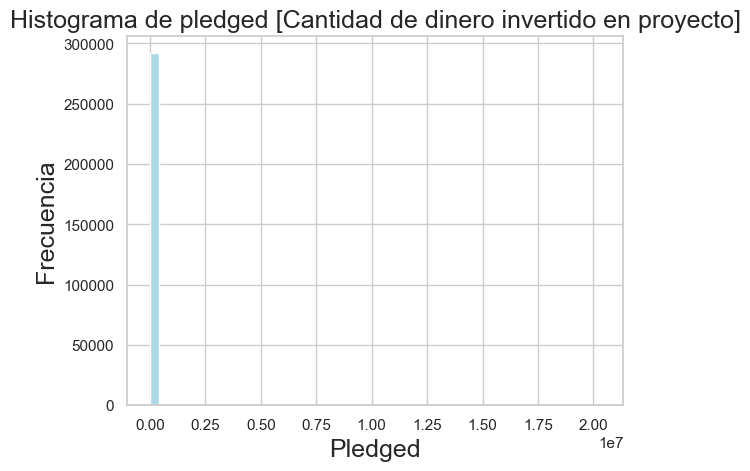

In [492]:
# es importante que el grafico tenga un correcto titulo y valores descriptivos en barras
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
g = projects_2017["pledged"].plot.hist(bins=50, color='lightblue')
g.set_title("Histograma de pledged [Cantidad de dinero invertido en proyecto]", fontsize=18)
g.set_xlabel("Pledged",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

In [490]:
# creamos nuevas columnas en escala logaritmica
projects_2017["pledged_log"] = np.log(projects_2017["pledged"]+1)
projects_2017["goal_log"] = np.log(projects_2017["goal"]+1)

### Histograma

Un histograma sirve para mostrar la distribucion de una determinada variable. Para construirlo hacen falta dos parametros: la variable en cuestion que tiene que ser numerica (continua o discreta) y el ancho que van a tener las columnas del histograma. Este valor se fija en matplotlib con el valor de bins, que indica cuanto discretizamos los intervalos.


Text(0, 0.5, 'Frecuencia')

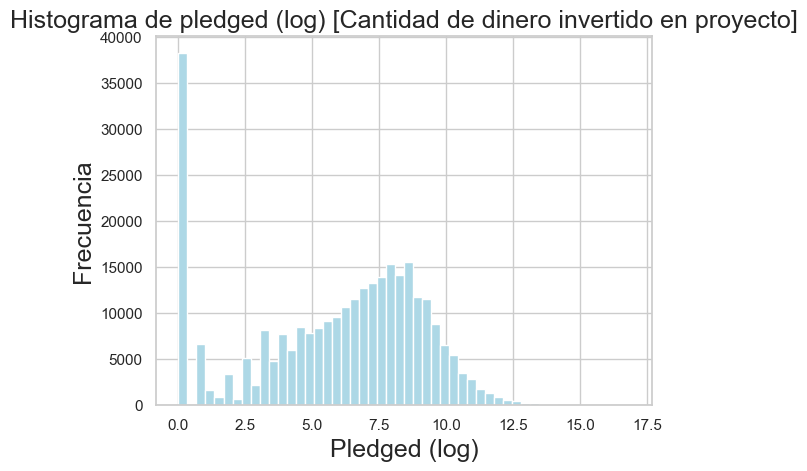

In [498]:
# es importante que el grafico tenga un correcto titulo y valores descriptivos en barras
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
g = projects_2017["pledged_log"].plot.hist(bins=50, color='lightblue')
g.set_title("Histograma de pledged (log) [Cantidad de dinero invertido en proyecto]", fontsize=18)
g.set_xlabel("Pledged (log)",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

Text(0, 0.5, 'Frecuencia')

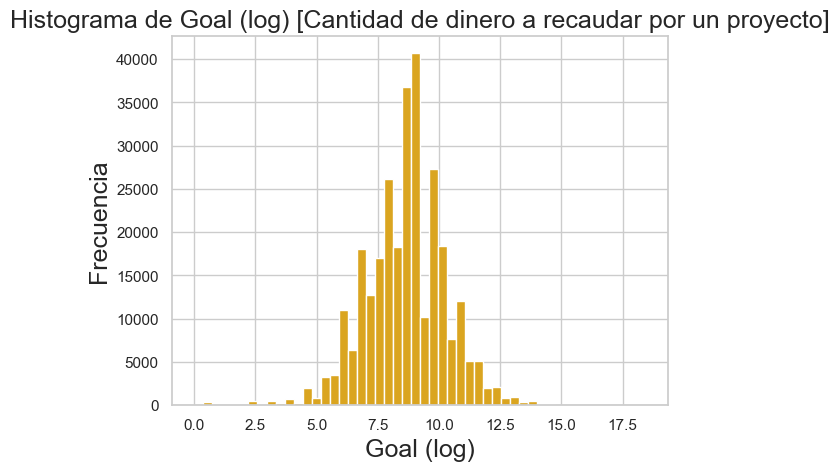

In [499]:
g = projects_2017["goal_log"].plot.hist(bins=50, color='goldenrod')
g.set_title("Histograma de Goal (log) [Cantidad de dinero a recaudar por un proyecto]", fontsize=18)
g.set_xlabel("Goal (log)",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

### Density Plot

Un plot de densidad es una version continua de un histograma (no es necesario indicar el tamaño de los bins). Lo que se muestra es como se distribuye la densidad de la variable numerica a lo largo de todos sus valores posibles.

Text(0, 0.5, 'Densidad')

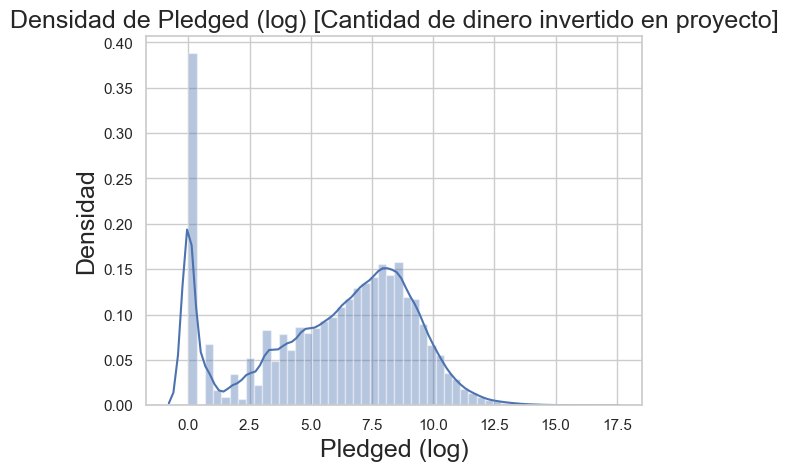

In [502]:
# https://seaborn.pydata.org/generated/seaborn.distplot.html
g = sns.distplot(projects_2017["pledged_log"], bins=50)
g.set_title("Densidad de Pledged (log) [Cantidad de dinero invertido en proyecto]", fontsize=18)
g.set_xlabel("Pledged (log)",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

Text(0, 0.5, 'Densidad')

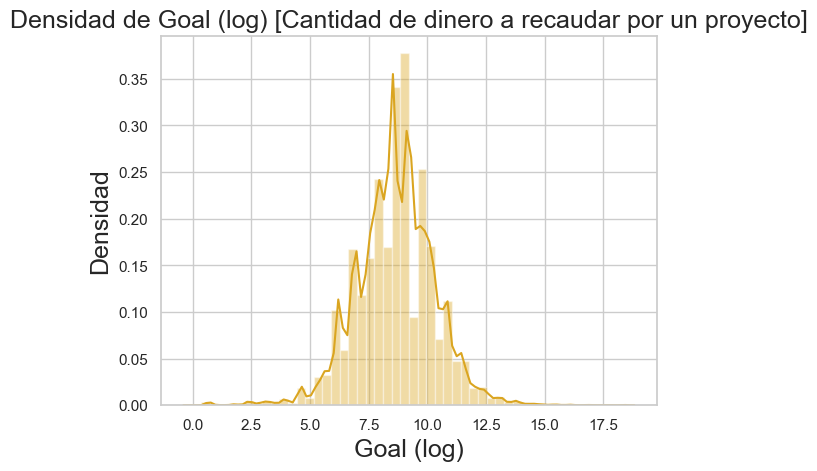

In [503]:
g = sns.distplot(projects_2017["goal_log"], color='goldenrod', bins=50)
g.set_title("Densidad de Goal (log) [Cantidad de dinero a recaudar por un proyecto]", fontsize=18)
g.set_xlabel("Goal (log)",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

## Overlaid Histogram

Una forma de comparar distribuciones sobre una misma base es realizar un overlay de distintos histogramas.

Text(0, 0.5, 'Frecuencia')

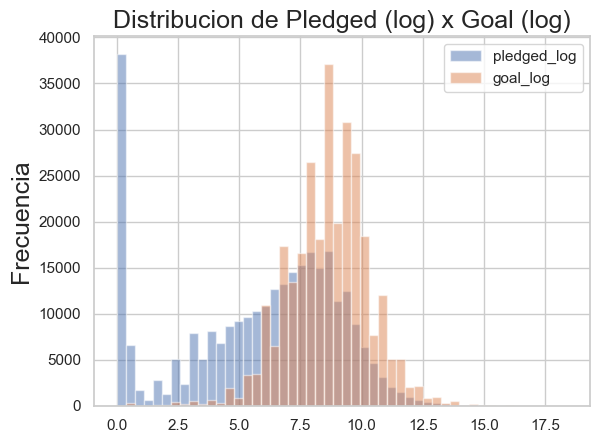

In [504]:
# ambos histogramas juntos
g = projects_2017[["pledged_log","goal_log"]].plot.hist(bins=50,alpha=0.5)
g.set_title("Distribucion de Pledged (log) x Goal (log)", fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

## Overlaid Density Plots

O tambien se pueden analizar directamente comparando sus densidades

Text(0.5, 1.0, 'Pledged x Goal cross distribuition')

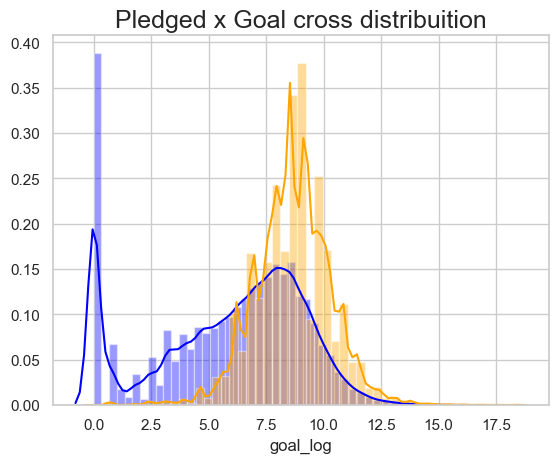

In [505]:
# TODO referencias por color en la visualizacion
g = sns.distplot(projects_2017['pledged_log'], color='blue', label='pledged (log)')
g = sns.distplot(projects_2017['goal_log'], color='orange', label='goal (log)')
g.set_title("Pledged x Goal cross distribuition", fontsize=18)

## Analizando por Estado del proyecto

Otro aspecto que podriamos considerar es analizar los proyecto segun su estado final (variable categorica), para ello podemos sacar inicialmente algunas estadisticas que pueden servirnos para el analisis en relacion a su media y desvio.

In [506]:
projects_2017['state'].value_counts()

failed        152061
successful    109299
canceled       28311
live            1740
suspended       1216
Name: state, dtype: int64

In [507]:
print("Calculando la media por estado final del proyecto")
print(round(projects_2017.groupby(["state"])["goal", "pledged"].mean(),2))

Calculando la media por estado final del proyecto
                           goal              pledged
state                                               
canceled              76,293.96             2,317.80
failed                60,664.24             1,331.17
live                  84,039.95             6,352.72
successful             9,695.67            23,212.89
suspended            242,796.61            11,119.73


In [508]:
print("Calculando el desvio standard por estado final del proyecto")
print(round(projects_2017.groupby(["state"])["goal", "pledged"].std(),2))

Calculando el desvio standard por estado final del proyecto
                           goal              pledged
state                                               
canceled           1,295,688.35            12,830.64
failed             1,356,864.41             6,999.57
live               2,377,370.28            35,855.06
successful            28,790.07           160,709.99
suspended          4,239,279.71           120,736.14


## Boxplot

Una forma de ver esta misma informacion es utilizar una visualizacion conocida como boxplot. Usualmente usamos un boxplot para ver la distribucion de una variable numerica de acuerdo a una variable categorica (en este caso los distintos estados posibles de un proyecto).

Text(0, 0.5, 'Pledged (Log)')

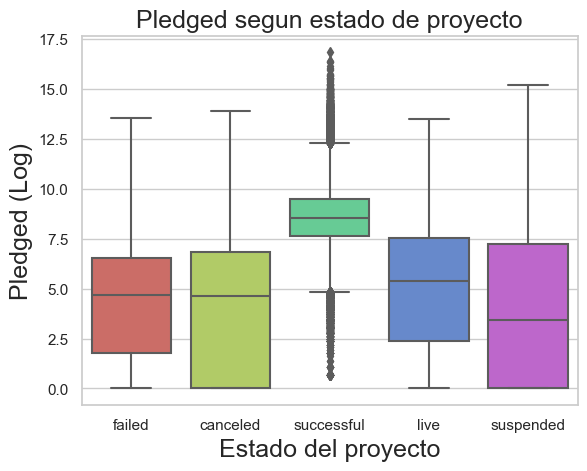

In [509]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
g = sns.boxplot(x="state", y="pledged_log", 
                     data=projects_2017, palette="hls")
g.set_title("Pledged segun estado de proyecto", fontsize=18)
g.set_xlabel("Estado del proyecto", fontsize=18)
g.set_ylabel("Pledged (Log)", fontsize=18)

Para leerlo tenemos que considerar que la 'caja' del boxplot va desde el primer al tercer cuantil, es decir que el 25% de los datos estan por debajo de la caja y el 25% de los datos estan por encima de la caja. La caja concentra entonces el 50% de los datos. Las lıneas que salen de la caja van desde el primer cuantil hasta el valor minimo y maximo y los puntos son valores anomalos (outliers).

# Categoria con mayor cantidad de proyectos

Pasando a las variables categoricas podriamos querer analizar cuales son las categorias que tienen la mayor cantidad de proyectos.

In [510]:
main_categories_counts = projects_2017["main_category"].value_counts()
main_categories_counts

Film & Video    51922
Music           43238
Publishing      31726
Games           24636
Art             22311
Design          21690
Technology      21556
Food            19941
Fashion         16584
Comics           8910
Theater          8709
Photography      7988
Crafts           6648
Journalism       3540
Dance            3228
Name: main_category, dtype: int64

## Bar Plot

Una forma de poder visualizar este tipo de informacion es utiliza un Bar Plot, de uso bastante popular y donde se cometen muchos errores. Algunas cosas que hay que tener en cuenta es que una de las variables a considerar debe ser categorica y por otro lado, los valores a evaluar deben comenzar en 0.

Existen otras variantes haciendo stacking de valores o directamente indicandolos en barras separadas de forma de que queden agrupados.

Text(0, 0.5, 'Name of Category')

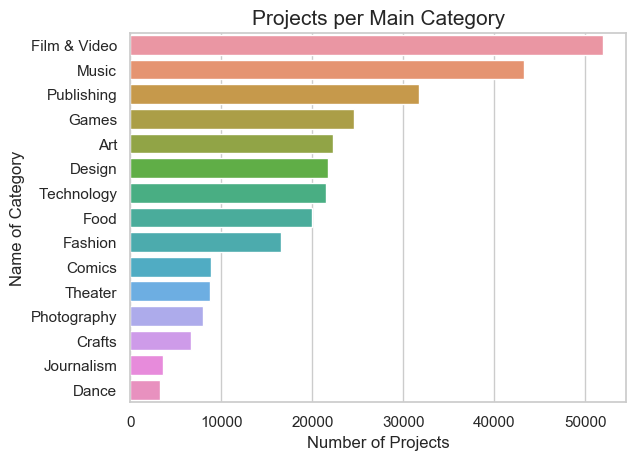

In [511]:
# https://seaborn.pydata.org/generated/seaborn.barplot.html
g = sns.barplot(x=main_categories_counts.values, y=main_categories_counts.index, orient='h')
g.set_title("Projects per Main Category", fontsize=15)
g.set_xlabel("Number of Projects", fontsize=12)
g.set_ylabel("Name of Category", fontsize=12)

Text(0.5, 1.0, 'Projects per Main Category')

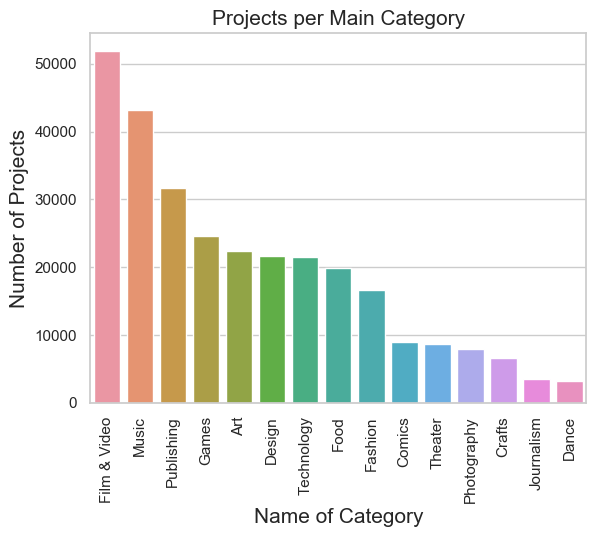

In [512]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html
# simplificacion para hacerlo via seaborn con countplot
g = sns.countplot(x='main_category', data=projects_2017, order=projects_2017['main_category'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Name of Category", fontsize=15)
g.set_ylabel("Number of Projects", fontsize=15)
g.set_title("Projects per Main Category", fontsize=15)

## Analisis por Categorias Exitosas y Fallidas

Podemos utilizar este tipo de visualizacion para realizar analisis por categorias exitosas y fallidas.

In [513]:
categories_failed = projects_2017[projects_2017["state"] == "failed"]["category"].value_counts()[:25]
categories_failed

Product Design      7894
Documentary         7185
Food                5829
Music               5177
Fiction             4912
Film & Video        4747
Video Games         4579
Nonfiction          4333
Fashion             4302
Shorts              3975
Apparel             3499
Children's Books    3200
Art                 3164
Technology          2985
Apps                2985
Tabletop Games      2958
Webseries           2956
Photography         2745
Hip-Hop             2618
Publishing          2603
Rock                2413
Narrative Film      2390
Web                 2338
Crafts              2270
Theater             1988
Name: category, dtype: int64

Text(0, 0.5, 'Nombre de la categoria')

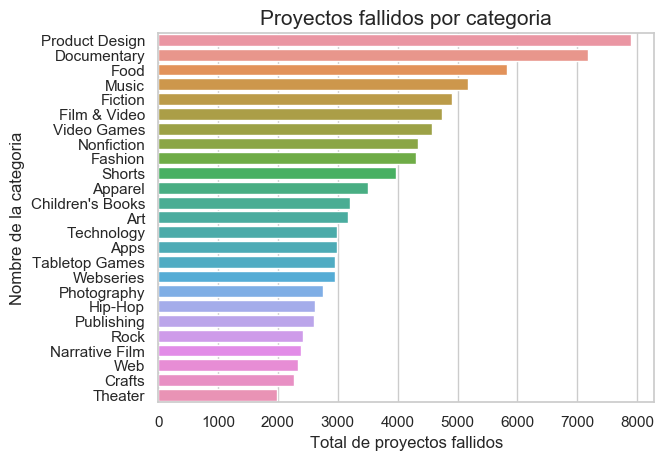

In [514]:
g = sns.barplot(x= categories_failed.values, y=categories_failed.index)
g.set_title("Proyectos fallidos por categoria", fontsize=15)
g.set_xlabel("Total de proyectos fallidos", fontsize=12)
g.set_ylabel("Nombre de la categoria", fontsize=12)

In [515]:
categories_sucessful = projects_2017[projects_2017["state"] == "successful"]["category"].value_counts()[:25]
categories_sucessful

Tabletop Games      5981
Product Design      5838
Music               5749
Shorts              5559
Documentary         5164
Theater             3891
Indie Rock          3441
Rock                3237
Food                2999
Art                 2750
Film & Video        2657
Country & Folk      2595
Comics              2245
Children's Books    1967
Fiction             1925
Narrative Film      1862
Fashion             1849
Nonfiction          1843
Video Games         1671
Photography         1602
Webseries           1528
Dance               1447
Classical Music     1412
Pop                 1395
Public Art          1394
Name: category, dtype: int64

Text(0, 0.5, 'Nombre de categoria')

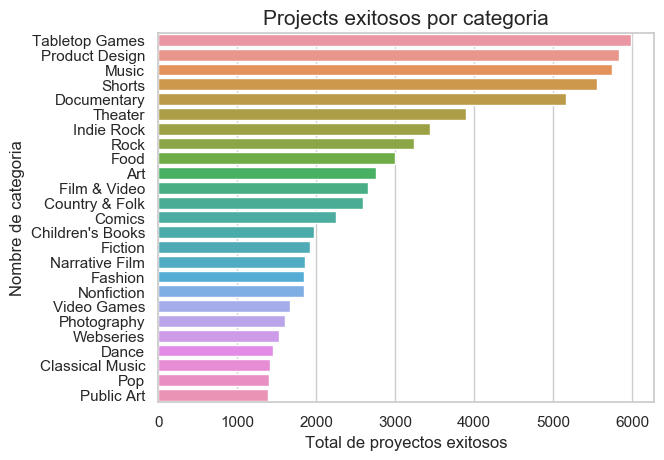

In [516]:
g = sns.barplot(x= categories_sucessful.values, y=categories_sucessful.index)
g.set_title("Projects exitosos por categoria", fontsize=15)
g.set_xlabel("Total de proyectos exitosos", fontsize=12)
g.set_ylabel("Nombre de categoria", fontsize=12)

## Analisis Temporal 

Para poder facilitar el analisis temporal de la informacion agregamos a nuestro data frame algunas columnas a partir del procesamiento de el valor de launched como datetime, y generamos algunas columnas para permitir agrupamientos por año, mes y dia de la semana.

In [517]:
# procesamiento de fechas de lanzamiento en mes y año
projects_2017['launched'] = pd.to_datetime(projects_2017['launched'])
projects_2017['launch_month'] = projects_2017['launched'].dt.month
projects_2017['launch_year'] = projects_2017['launched'].dt.year
projects_2017['launch_weekday_name'] = projects_2017['launched'].dt.weekday_name

Para poder entender algunos aspectos de los datos, utilizamos [crosstab](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) para obtener una cross tabulacion de dos factores. Por default utiliza la frecuencia.

In [518]:
#cantidades por estado y año
pd.crosstab(projects_2017.launch_year, projects_2017.state)

state,canceled,failed,live,successful,suspended
launch_year,,,,,
1970,6,0,0,0,0
2009,150,600,0,579,0
2010,926,4984,0,4593,16
2011,2144,11878,0,12171,44
2012,2572,20217,0,17706,52
2013,3025,18407,0,17201,54
2014,5288,28498,0,16811,172
2015,6165,31459,0,15451,468
2016,4608,20406,1,12803,212


## Grouped Bar Plot

Para visualizar esta informacion podemos crear un Grouped Bar Plot agrupando por el estado del proyecto


Text(0, 0.5, 'Cantidad de Proyectos')

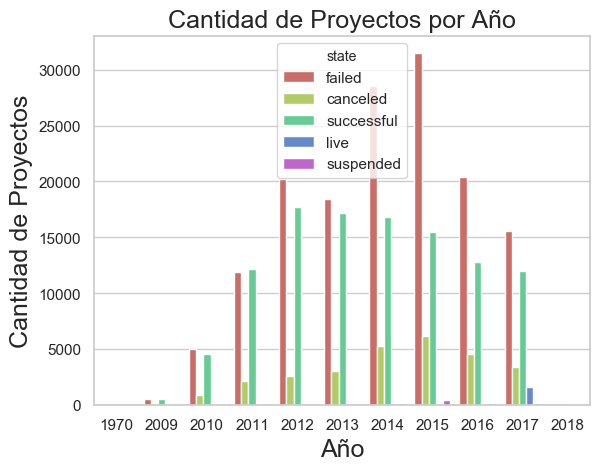

In [519]:
g = sns.countplot(x="launch_year", hue="state", data=projects_2017, palette="hls")
g.set_title("Cantidad de Proyectos por Año", fontsize=18)
g.set_xlabel("Año", fontsize=18)
g.set_ylabel("Cantidad de Proyectos", fontsize=18)

# Nota: Stacked Bar Plot
# al creador de seaborn no le gustan los stacked http://randyzwitch.com/creating-stacked-bar-chart-seaborn/
# Investigar como realizarlo en https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html

## Heatmap

Supongamos que tenemos un set de datos de la forma (name,variable,value) por ejemplo ("Año Lanzamiento de Proyecto", "Mes de Lanzamiento de Proyecto", "Goal del Proyecto") indicando que en el año 2017, en el mes de Marzo hubo un promedio de 76000 dolares por proyecto. 

Un heatmap representa en el eje Y todos los puntos, instancias (años) y en el eje X cada una de las categorias posibles (meses en este caso). Los ejes suelen ser intercambiables sin que afecte la visualizacin. 

El heatmap es entonces una matriz en donde cada celda muestra el valor que toma la variable del eje X para el punto del eje Y, tomando con valores de un cierto color cuando son mas altos y de otro cuando son mas bajos.

## Analizando Goal por Año y Mes

In [523]:
# llevamos a una representacion de ese tipo usando una tabla pivot (se vera en detalle en la proxima clase).
# tener en cuenta que no puede haber valores duplicados por el indice por lo cual es necesario usar algun tipo
# funcion de agregacion
for_heatmap = projects_2017[projects_2017['state'] == 'successful'].pivot_table(index='launch_year', columns='launch_month', values='pledged', aggfunc='mean')

In [524]:
for_heatmap

launch_month,1,2,3,4,5,6,7,8,9,10,11,12
launch_year,,,,,,,,,,,,
2009,nan,nan,nan,"2,523.51","2,953.62","3,137.13","4,120.44","4,899.96","5,051.40","4,246.93","4,076.30","4,816.46"
2010,"5,559.69","4,781.70","5,229.53","5,080.24","5,113.73","4,695.63","5,088.02","5,310.55","5,917.20","5,987.57","7,359.09","5,940.44"
2011,"5,822.59","6,187.71","6,662.62","6,224.44","7,489.69","7,215.29","7,101.71","7,264.22","7,723.09","7,341.83","11,098.69","10,123.67"
2012,"8,225.82","10,990.82","11,362.17","21,365.78","14,716.25","13,038.39","21,431.67","19,829.46","21,606.70","15,058.82","17,043.81","14,700.41"
2013,"16,649.86","17,739.22","28,681.12","22,720.77","23,375.22","20,961.68","21,448.58","20,368.52","24,276.77","25,207.95","20,923.73","20,512.93"
2014,"20,700.48","22,281.55","25,075.65","23,563.18","26,378.07","26,232.77","25,329.99","16,941.67","18,435.97","20,369.24","23,827.14","18,827.07"
2015,"35,642.49","38,522.52","27,208.11","22,997.08","32,284.99","33,139.52","39,964.17","27,679.48","36,434.68","37,671.91","34,617.69","19,509.71"
2016,"26,155.02","34,584.58","35,221.05","28,731.91","45,148.56","39,150.69","42,312.35","32,489.92","39,226.13","35,772.16","45,579.92","21,707.65"
2017,"26,517.49","34,393.19","37,539.19","34,034.58","42,810.25","36,523.17","36,566.65","32,964.14","43,787.48","32,591.50","25,782.97","8,777.38"


Text(47.25, 0.5, 'Año de Lanzamiento del Proyecto')

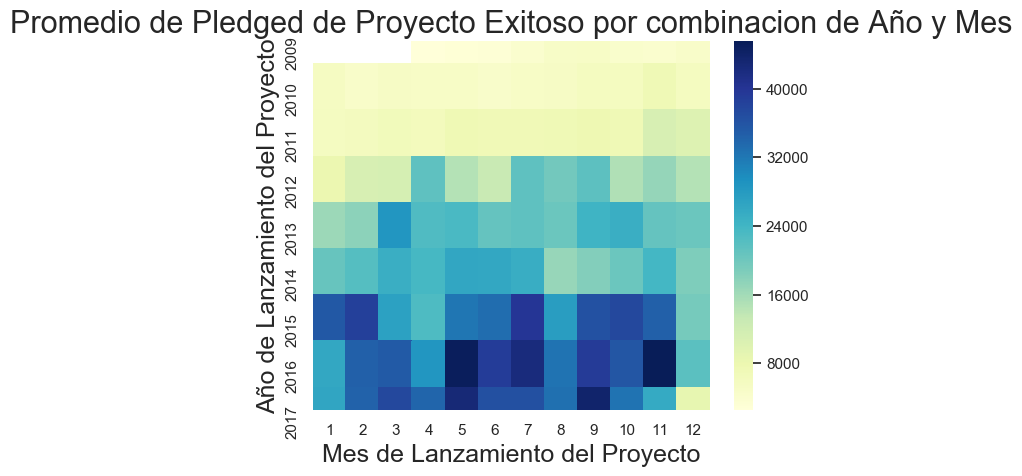

In [526]:
# https://en.wikipedia.org/wiki/Kickstarter
# notar que segun la empresa de lanzo en 2009 en abril
# Launched April 28, 2009; 8 years ago
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Promedio de Pledged de Proyecto Exitoso por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=18)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=18)

Text(47.25, 0.5, 'Año de Lanzamiento del Proyecto')

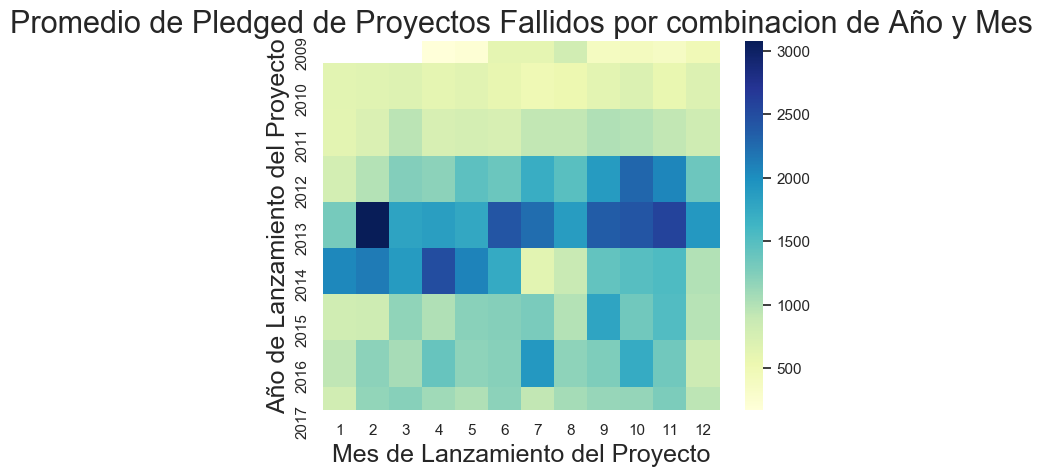

In [528]:
# llevamos a una representacion de ese tipo usando una tabla pivot (se vera en detalle en la proxima clase).
# tener en cuenta que no puede haber valores duplicados por el indice por lo cual es necesario usar algun tipo
# funcion de agregacion
for_heatmap = projects_2017[projects_2017['state'] == 'failed'].pivot_table(index='launch_year', columns='launch_month', values='pledged', aggfunc='mean')
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Promedio de Pledged de Proyectos Fallidos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=18)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=18)

## Analizando Lanzamientos de proyectos por año y mes

In [531]:
# generamos una columna para agregar y procesar mediante una tabla pivot
projects_2017['active_project'] = 1
for_heatmap = projects_2017.pivot_table(index='launch_year', columns='launch_month', values='active_project', aggfunc='sum')

In [532]:
for_heatmap

launch_month,1,2,3,4,5,6,7,8,9,10,11,12
launch_year,,,,,,,,,,,,
1970,6.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009,nan,nan,nan,19.00,74.00,75.00,78.00,115.00,348.00,194.00,218.00,208.00
2010,296.00,371.00,511.00,678.00,760.00,"1,093.00","1,067.00",967.00,"1,028.00","1,210.00","1,272.00","1,266.00"
2011,"1,594.00","1,803.00","2,025.00","2,243.00","2,288.00","2,294.00","2,368.00","2,320.00","2,151.00","2,311.00","2,612.00","2,228.00"
2012,"2,903.00","3,358.00","4,048.00","3,773.00","3,962.00","3,927.00","3,664.00","3,521.00","3,042.00","3,397.00","2,859.00","2,093.00"
2013,"2,919.00","2,980.00","3,404.00","3,549.00","3,748.00","3,398.00","3,458.00","3,108.00","3,057.00","3,454.00","3,280.00","2,332.00"
2014,"2,759.00","2,940.00","3,421.00","3,485.00","3,517.00","3,861.00","8,198.00","5,659.00","4,865.00","4,934.00","4,174.00","2,956.00"
2015,"4,955.00","5,603.00","5,988.00","5,489.00","4,810.00","4,588.00","4,033.00","3,871.00","3,936.00","3,839.00","3,817.00","2,614.00"
2016,"3,332.00","3,515.00","3,828.00","3,455.00","3,460.00","3,332.00","2,994.00","3,100.00","2,897.00","3,176.00","2,935.00","2,006.00"


Text(47.25, 0.5, 'Año de Lanzamiento del Proyecto')

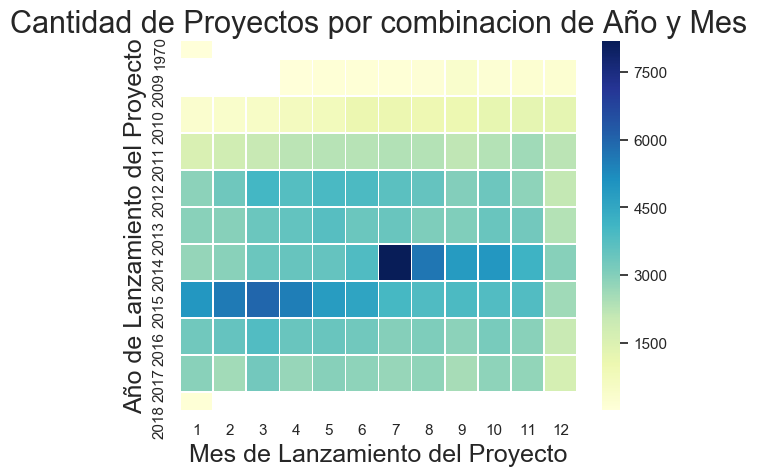

In [533]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Proyectos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=18)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=18)

# Mas sobre manipulacion de Series y Dataframes


## Rename

Nos permite renombrar tanto labels de las columnas y las filas.

In [534]:
renamed_projects = pd.read_csv('../data/kickstarter-projects/ks-projects-201801.csv')
renamed_projects.set_index('name', inplace=True)

In [535]:
renamed_projects

,ID,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
name,,,,,,,,,,,,,,
The Songs of Adelaide & Abullah,1000002330,Poetry,Publishing,GBP,2015-10-09,"1,000.00",2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,"1,533.95"
Greeting From Earth: ZGAC Arts Capsule For ET,1000003930,Narrative Film,Film & Video,USD,2017-11-01,"30,000.00",2017-09-02 04:43:57,"2,421.00",failed,15,US,100.00,"2,421.00","30,000.00"
Where is Hank?,1000004038,Narrative Film,Film & Video,USD,2013-02-26,"45,000.00",2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,"45,000.00"
ToshiCapital Rekordz Needs Help to Complete Album,1000007540,Music,Music,USD,2012-04-16,"5,000.00",2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,"5,000.00"
Community Film Project: The Art of Neighborhood Filmmaking,1000011046,Film & Video,Film & Video,USD,2015-08-29,"19,500.00",2015-07-04 08:35:03,"1,283.00",canceled,14,US,"1,283.00","1,283.00","19,500.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ChknTruk Nationwide Charity Drive 2014 (Canceled),999976400,Documentary,Film & Video,USD,2014-10-17,"50,000.00",2014-09-17 02:35:30,25.00,canceled,1,US,25.00,25.00,"50,000.00"
The Tribe,999977640,Narrative Film,Film & Video,USD,2011-07-19,"1,500.00",2011-06-22 03:35:14,155.00,failed,5,US,155.00,155.00,"1,500.00"
Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!,999986353,Narrative Film,Film & Video,USD,2010-08-16,"15,000.00",2010-07-01 19:40:30,20.00,failed,1,US,20.00,20.00,"15,000.00"


In [536]:
idx_rename = {'The Songs of Adelaide & Abullah':'The Songs of Adelaide & Abullah'[::-1],\
              'Greeting From Earth: ZGAC Arts Capsule For ET': 'Greeting From Earth: ZGAC Arts Capsule For ET'[::-1]} 
col_rename = {'category':'Category', 
                  'main_category': 'Main Category',
                  'currency': 'Currency',
                  'deadline': 'End Date'}

In [537]:
renamed_projects.rename(index=idx_rename, columns=col_rename)

,ID,Category,Main Category,Currency,End Date,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
name,,,,,,,,,,,,,,
hallubA & edialedA fo sgnoS ehT,1000002330,Poetry,Publishing,GBP,2015-10-09,"1,000.00",2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,"1,533.95"
TE roF eluspaC strA CAGZ :htraE morF gniteerG,1000003930,Narrative Film,Film & Video,USD,2017-11-01,"30,000.00",2017-09-02 04:43:57,"2,421.00",failed,15,US,100.00,"2,421.00","30,000.00"
Where is Hank?,1000004038,Narrative Film,Film & Video,USD,2013-02-26,"45,000.00",2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,"45,000.00"
ToshiCapital Rekordz Needs Help to Complete Album,1000007540,Music,Music,USD,2012-04-16,"5,000.00",2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,"5,000.00"
Community Film Project: The Art of Neighborhood Filmmaking,1000011046,Film & Video,Film & Video,USD,2015-08-29,"19,500.00",2015-07-04 08:35:03,"1,283.00",canceled,14,US,"1,283.00","1,283.00","19,500.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ChknTruk Nationwide Charity Drive 2014 (Canceled),999976400,Documentary,Film & Video,USD,2014-10-17,"50,000.00",2014-09-17 02:35:30,25.00,canceled,1,US,25.00,25.00,"50,000.00"
The Tribe,999977640,Narrative Film,Film & Video,USD,2011-07-19,"1,500.00",2011-06-22 03:35:14,155.00,failed,5,US,155.00,155.00,"1,500.00"
Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!,999986353,Narrative Film,Film & Video,USD,2010-08-16,"15,000.00",2010-07-01 19:40:30,20.00,failed,1,US,20.00,20.00,"15,000.00"


## nsmallest / nlargest

Supongamos que queremos encontrar de los 100 proyectos que obtuvieron la mayor cantidad de dinero, aquellos que realmente obtuvieron la menor cantidad de backers.

In [538]:
projects = projects_2017[projects_2017['country'] == 'US']
projects.head()

,index,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd_pledged_real,usd_goal_real,launched_datetime,year,pledged_log,goal_log,launch_month,launch_year,launch_weekday_name,active_project
ID,,,,,,,,,,,,,,,,,,,,,
1000003930,1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,"30,000.00",2017-09-02 04:43:57,"2,421.00",failed,...,"2,421.00","30,000.00",2017-09-02 04:43:57,2017,7.79,10.31,9,2017,Saturday,1
1000004038,2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,"45,000.00",2013-01-12 00:20:50,220.00,failed,...,220.00,"45,000.00",2013-01-12 00:20:50,2013,5.40,10.71,1,2013,Saturday,1
1000007540,3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,"5,000.00",2012-03-17 03:24:11,1.00,failed,...,1.00,"5,000.00",2012-03-17 03:24:11,2012,0.69,8.52,3,2012,Saturday,1
1000011046,4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,"19,500.00",2015-07-04 08:35:03,"1,283.00",canceled,...,"1,283.00","19,500.00",2015-07-04 08:35:03,2015,7.16,9.88,7,2015,Saturday,1
1000014025,5,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,"50,000.00",2016-02-26 13:38:27,"52,375.00",successful,...,"52,375.00","50,000.00",2016-02-26 13:38:27,2016,10.87,10.82,2,2016,Friday,1


In [541]:
#tener en cuenta que ordena por la columna especifica
projects.nlargest(100,'pledged').nsmallest(5, 'backers') 

,index,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd_pledged_real,usd_goal_real,launched_datetime,year,pledged_log,goal_log,launch_month,launch_year,launch_weekday_name,active_project
ID,,,,,,,,,,,,,,,,,,,,,
59589719,299656,Skycamp: The Perfect Roof Top Tent for Travele...,Product Design,Design,USD,2017-04-13,"100,000.00",2017-02-27 17:00:00,"2,370,611.00",successful,...,"2,370,611.00","100,000.00",2017-02-27 17:00:00,2017,14.68,11.51,2,2017,Monday,1
137993716,74551,SpeedX Leopard | the first ever smart aero roa...,Technology,Technology,USD,2016-04-22,"50,000.00",2016-03-23 15:01:47,"2,319,876.00",successful,...,"2,319,876.00","50,000.00",2016-03-23 15:01:47,2016,14.66,10.82,3,2016,Wednesday,1
1332157704,65297,Sisyphus – The Kinetic Art Table,Sculpture,Art,USD,2016-10-24,"50,000.00",2016-09-24 19:00:30,"1,924,018.00",successful,...,"1,924,018.00","50,000.00",2016-09-24 19:00:30,2016,14.47,10.82,9,2016,Saturday,1
1605249489,119134,"FORM 1: An affordable, professional 3D printer",Technology,Technology,USD,2012-10-26,"100,000.00",2012-09-26 14:45:41,"2,945,885.21",successful,...,"2,945,885.21","100,000.00",2012-09-26 14:45:41,2012,14.90,11.51,9,2012,Wednesday,1
1718720152,141474,eVscope | 100 times more powerful than a class...,Space Exploration,Technology,USD,2017-11-24,"150,000.00",2017-10-25 15:49:07,"2,209,270.00",successful,...,"2,209,270.00","150,000.00",2017-10-25 15:49:07,2017,14.61,11.92,10,2017,Wednesday,1


## Sort Values

Tambien es posible ordenar valores a partir de una columna especifica de tal forma de poder utilizar el df de forma ordenada.

In [542]:
projects.sort_values('pledged', ascending=False)

,index,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd_pledged_real,usd_goal_real,launched_datetime,year,pledged_log,goal_log,launch_month,launch_year,launch_weekday_name,active_project
ID,,,,,,,,,,,,,,,,,,,,,
1799979574,157270,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,"500,000.00",2015-02-24 15:44:42,"20,338,986.27",successful,...,"20,338,986.27","500,000.00",2015-02-24 15:44:42,2015,16.83,13.12,2,2015,Tuesday,1
342886736,250254,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,USD,2014-08-30,"50,000.00",2014-07-08 10:14:37,"13,285,226.36",successful,...,"13,285,226.36","50,000.00",2014-07-08 10:14:37,2014,16.40,10.82,7,2014,Tuesday,1
2103598555,216629,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,USD,2016-06-30,"1,000,000.00",2016-05-24 15:49:52,"12,779,843.49",successful,...,"12,779,843.49","1,000,000.00",2016-05-24 15:49:52,2016,16.36,13.82,5,2016,Tuesday,1
545070200,289915,Kingdom Death: Monster 1.5,Tabletop Games,Games,USD,2017-01-08,"100,000.00",2016-11-25 06:01:41,"12,393,139.69",successful,...,"12,393,139.69","100,000.00",2016-11-25 06:01:41,2016,16.33,11.51,11,2016,Friday,1
506924864,282416,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,USD,2012-05-19,"100,000.00",2012-04-11 06:59:04,"10,266,845.74",successful,...,"10,266,845.74","100,000.00",2012-04-11 06:59:04,2012,16.14,11.51,4,2012,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807119010,341050,El Presidente la Cheeto,Art,Art,USD,2017-02-10,"5,000.00",2017-01-26 23:39:33,0.00,failed,...,0.00,"5,000.00",2017-01-26 23:39:33,2017,0.00,8.52,1,2017,Thursday,1
537436525,288390,slut phase: a webseries,Webseries,Film & Video,USD,2011-03-20,"3,500.00",2011-01-27 23:22:55,0.00,failed,...,0.00,"3,500.00",2011-01-27 23:22:55,2011,0.00,8.16,1,2011,Thursday,1
1099180723,19550,Save The Sneels - Help Record Our EP,Indie Rock,Music,USD,2012-09-12,"15,000.00",2012-08-13 19:14:15,0.00,failed,...,0.00,"15,000.00",2012-08-13 19:14:15,2012,0.00,9.62,8,2012,Monday,1


In [543]:
# podemos replicar lo anterior de la siguiente forma (es mas ineficiente)
projects.sort_values('pledged', ascending=False).head(100).sort_values('backers', ascending=True).head(5)

,index,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd_pledged_real,usd_goal_real,launched_datetime,year,pledged_log,goal_log,launch_month,launch_year,launch_weekday_name,active_project
ID,,,,,,,,,,,,,,,,,,,,,
59589719,299656,Skycamp: The Perfect Roof Top Tent for Travele...,Product Design,Design,USD,2017-04-13,"100,000.00",2017-02-27 17:00:00,"2,370,611.00",successful,...,"2,370,611.00","100,000.00",2017-02-27 17:00:00,2017,14.68,11.51,2,2017,Monday,1
137993716,74551,SpeedX Leopard | the first ever smart aero roa...,Technology,Technology,USD,2016-04-22,"50,000.00",2016-03-23 15:01:47,"2,319,876.00",successful,...,"2,319,876.00","50,000.00",2016-03-23 15:01:47,2016,14.66,10.82,3,2016,Wednesday,1
1332157704,65297,Sisyphus – The Kinetic Art Table,Sculpture,Art,USD,2016-10-24,"50,000.00",2016-09-24 19:00:30,"1,924,018.00",successful,...,"1,924,018.00","50,000.00",2016-09-24 19:00:30,2016,14.47,10.82,9,2016,Saturday,1
1605249489,119134,"FORM 1: An affordable, professional 3D printer",Technology,Technology,USD,2012-10-26,"100,000.00",2012-09-26 14:45:41,"2,945,885.21",successful,...,"2,945,885.21","100,000.00",2012-09-26 14:45:41,2012,14.90,11.51,9,2012,Wednesday,1
1718720152,141474,eVscope | 100 times more powerful than a class...,Space Exploration,Technology,USD,2017-11-24,"150,000.00",2017-10-25 15:49:07,"2,209,270.00",successful,...,"2,209,270.00","150,000.00",2017-10-25 15:49:07,2017,14.61,11.92,10,2017,Wednesday,1


## Map

Permite hacer un map de valores con correspondencia al input recibido. Es de utilidad para sustituir cada valor en una serie por el resultado de una funcion, un ```dict``` o una serie.


In [545]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html
projects_2017['main_category'].map(lambda x: str(x).upper()).value_counts()

FILM & VIDEO    51922
MUSIC           43238
PUBLISHING      31726
GAMES           24636
ART             22311
DESIGN          21690
TECHNOLOGY      21556
FOOD            19941
FASHION         16584
COMICS           8910
THEATER          8709
PHOTOGRAPHY      7988
CRAFTS           6648
JOURNALISM       3540
DANCE            3228
Name: main_category, dtype: int64

In [549]:
# notar que propaga los NaN al no haber match con la condicion
projects_2017['main_category'].map({'Comics': 'Historietas', 'Photography': 'Fotografia'}).value_counts()

Historietas    8910
Fotografia     7988
Name: main_category, dtype: int64

## Applymap

Aplica una funcion a cada elemento de un DataFrame (elementwise)

In [550]:
am_df = pd.DataFrame(np.random.randn(3, 3))
am_df

,0,1,2
0,-0.95,0.76,-0.07
1,1.43,-0.02,-1.21
2,-0.03,-1.37,-0.39


In [552]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html
# aplica formato a la representacion del numero
am_df.applymap(lambda x: '%.5f' % x)

,0,1,2
0,-0.95387,0.75620,-0.06561
1,1.42793,-0.01936,-1.21307
2,-0.03243,-1.36836,-0.39018


In [553]:
# notar que la version vectorizada es mas eficiente
am_df.applymap(lambda x: x ** 2) 

,0,1,2
0,0.91,0.57,0.00
1,2.04,0.00,1.47
2,0.00,1.87,0.15


## Cumsum

Realiza la suma acumulativa de una serie o un dataframe

In [554]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.cumsum.html

s = pd.Series([2, 3, 4, 5, 6])
s.cumsum()

0     2
1     5
2     9
3    14
4    20
dtype: int64

In [555]:
df = pd.DataFrame([[1.0, 1.0, 1.0],
                   [2.0, 2.0, 2.0],
                   [3.0, 3.0, 3.0]],
                   columns=list('ABC'))

In [556]:
df

,A,B,C
0,1.00,1.00,1.00
1,2.00,2.00,2.00
2,3.00,3.00,3.00


In [557]:
df.cumsum()

,A,B,C
0,1.00,1.00,1.00
1,3.00,3.00,3.00
2,6.00,6.00,6.00


In [567]:
df.cumsum(axis=1) # por columna

,A,B,C
0,3.00,6.00,9.00
1,2.00,7.00,9.00
2,1.00,2.00,3.00


## Cummax y Cummin

Busca el maximo / minimo acumulativo tanto en Series como Data Frames

In [568]:
df = pd.DataFrame([[3.0, 3.0, 3.0],
                   [2.0, 5.0, 2.0],
                   [1.0, 1.0, 1.0]],
                   columns=list('ABC'))
df

,A,B,C
0,3.00,3.00,3.00
1,2.00,5.00,2.00
2,1.00,1.00,1.00


In [571]:
df.cummax()

,A,B,C
0,3.00,3.00,3.00
1,3.00,5.00,3.00
2,3.00,5.00,3.00


In [572]:
df.cummax(axis=1) # por columna

,A,B,C
0,3.00,3.00,3.00
1,2.00,5.00,5.00
2,1.00,1.00,1.00


In [574]:
df

,A,B,C
0,3.00,3.00,3.00
1,2.00,5.00,2.00
2,1.00,1.00,1.00


In [575]:
df.cummin()

,A,B,C
0,3.00,3.00,3.00
1,2.00,3.00,2.00
2,1.00,1.00,1.00


## pct_change

Calcula el cambio de porcentaje entre un elemento y su siguiente de la serie

In [577]:
df

,A,B,C
0,3.00,3.00,3.00
1,2.00,5.00,2.00
2,1.00,1.00,1.00


In [578]:
df.pct_change() # por fila

,A,B,C
0,nan,nan,nan
1,-0.33,0.67,-0.33
2,-0.50,-0.80,-0.50


In [580]:
df

,A,B,C
0,3.00,3.00,3.00
1,2.00,5.00,2.00
2,1.00,1.00,1.00


In [579]:
df.pct_change(axis=1) # por columna

,A,B,C
0,nan,0.00,0.00
1,nan,1.50,-0.60
2,nan,0.00,0.00


## Shift

Shift index by desired number of periods with an optional time freq.

In [581]:
df = pd.DataFrame({'Col1': [10, 20, 15, 30, 45],\
                    'Col2': [13, 23, 18, 33, 48],\
                    'Col3': [17, 27, 22, 37, 52]})

In [582]:
df

,Col1,Col2,Col3
0,10,13,17
1,20,23,27
2,15,18,22
3,30,33,37
4,45,48,52


In [586]:
df.shift(periods=-1) # por columna

,Col1,Col2,Col3
0,20.00,23.00,27.00
1,15.00,18.00,22.00
2,30.00,33.00,37.00
3,45.00,48.00,52.00
4,nan,nan,nan


In [588]:
df.shift(periods=2) # por columna

,Col1,Col2,Col3
0,nan,nan,nan
1,nan,nan,nan
2,10.00,13.00,17.00
3,20.00,23.00,27.00
4,15.00,18.00,22.00


In [590]:
df.shift(periods=1,axis=1) # por columna

,Col1,Col2,Col3
0,nan,10.00,13.00
1,nan,20.00,23.00
2,nan,15.00,18.00
3,nan,30.00,33.00
4,nan,45.00,48.00


In [591]:
df.shift(periods=3, fill_value=0) # rellenado con un determinado valor de los NaN

,Col1,Col2,Col3
0,0,0,0
1,0,0,0
2,0,0,0
3,10,13,17
4,20,23,27


## Diff

Calcula la diferencia de un elemento del dataframe comparado con otro elemento en el dataframe (el default es el elemento de la misma columna con la fila previa).

In [592]:
df = pd.DataFrame({'a': [1, 2, 3, 4, 5, 6],\
                   'b': [1, 1, 2, 3, 5, 8],\
                   'c': [1, 4, 9, 16, 25, 36]})
df

,a,b,c
0,1,1,1
1,2,1,4
2,3,2,9
3,4,3,16
4,5,5,25
5,6,8,36


In [593]:
df.diff() #por fila

,a,b,c
0,nan,nan,nan
1,1.00,0.00,3.00
2,1.00,1.00,5.00
3,1.00,1.00,7.00
4,1.00,2.00,9.00
5,1.00,3.00,11.00


In [594]:
df.diff(axis=1) #investigar periods para realizar shifts en las comparaciones

,a,b,c
0,nan,0.00,0.00
1,nan,-1.00,3.00
2,nan,-1.00,7.00
3,nan,-1.00,13.00
4,nan,0.00,20.00
5,nan,2.00,28.00


## idxmax / idxmin

Calcula el indice de la primer ocurrencia del maximo/minimo sobre un eje especifico. (los valores nulos/NA son excluidos)


In [595]:
df

,a,b,c
0,1,1,1
1,2,1,4
2,3,2,9
3,4,3,16
4,5,5,25
5,6,8,36


In [596]:
df.idxmax()

a    5
b    5
c    5
dtype: int64

In [597]:
df.idxmax(axis=1)

0    a
1    c
2    c
3    c
4    c
5    c
dtype: object

In [598]:
df.idxmin()

a    0
b    0
c    0
dtype: int64

In [599]:
df.idxmin(axis=1)

0    a
1    b
2    b
3    b
4    a
5    a
dtype: object